# MICHALEWICZ FUNCTION

In [1]:
from IPython.display import Image
Image("MICHALEWICZ FUNCTION.png", width=800, height=800)

- Image Author: Alex Thevenot

###  Description:
Dimensions: d

The Michalewicz function has d! local minima, and it is multimodal. The parameter m defines the steepness of they valleys and ridges; a larger m leads to a more difficult search. The recommended value of m is m = 10. The function's two-dimensional form is shown in the plot above.

### Input Domain:
The function is usually evaluated on the hypercube xi ∈ [0, π], for all i = 1, …, d.

Source: https://www.sfu.ca/~ssurjano/michal.html

In [2]:
# Importing Libraries for creating and plotting objective function
import numpy as np
from numpy import arange
from numpy import pi
from numpy import sin
from numpy import meshgrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# Defining the objective function
def michal(x, m=10):
    sumation = 0
    for i in range(1,(len(x)+1)):
        sumation += sin(x[i-1]) * (sin(i*(x[i-1]**2)/pi)**(2*m))
    z = -sumation
    return(z)

In [4]:
# define range of inputs
X, Y = np.meshgrid(np.linspace(0, pi, 2000),
                   np.linspace(0, pi, 2000))

# compute targets
Z = michal([X,Y])

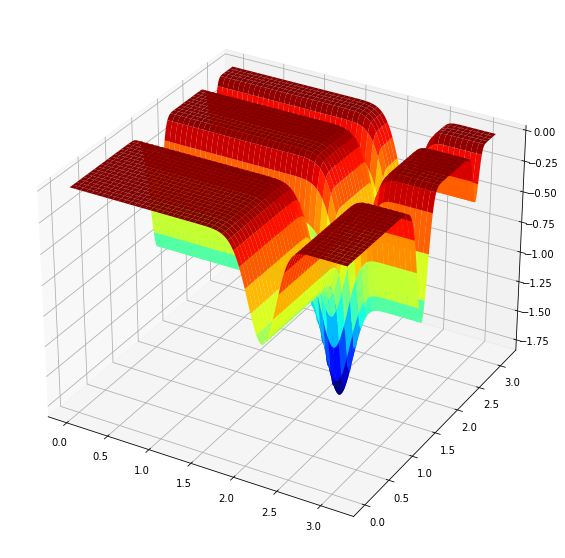

In [5]:
# create a surface plot with the jet color scheme
figure = plt.figure(figsize=(10,10))
axis = figure.gca(projection='3d')
axis.plot_surface(X, Y, Z, cmap='jet')
# show the plot
plt.show()

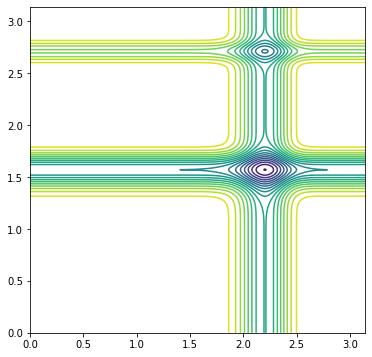

In [6]:
# create a contour plot
figure = plt.figure(figsize=(6,6))
plt.contour(X, Y, Z, levels = 20)
plt.show()


# 1. Gradient-based Optimisation

In [7]:
# Defining Gradient Decent Function

def grad_fd(fun,x, h=0.000001):
    
    fun_dx = (fun([x[0]+h,x[1]]) - fun(x))/h
    fun_dy = (fun([x[0],x[1]+h]) - fun(x))/h
    
    return np.array([fun_dx, fun_dy])

def grad_norm(grad):
    x = grad[0]
    y = grad[1]
        
    return (x**2 + y**2)**0.5

def backtrack(fun, alpha, ro, mu, x, sdir):
    
    gradient = grad_fd(fun, x)
    
    xnext = x[0]
    ynext = x[1]
    
    step = alpha

    while True:
        if fun([xnext + step*sdir[0], ynext + step*sdir[1]]) <= fun([xnext, ynext]) + mu*step*np.dot(gradient,sdir):
                break
        step = ro*step
    
    return step

def gradient_decent(str_point, obj_fun, x_range, y_range, iterr, plot=False, do_print=False):
    
    lw1, up1, num1 = x_range
    lw2, up2, num2 = y_range
    
    x, y = np.meshgrid(np.linspace(lw1, up1, num1), np.linspace(lw2, up2, num2))
    
    # starting point
    x0 = str_point[0]
    y0 = str_point[1]

    step_list = []
    points_list = []

    # plotting
    
    if plot:
        fig, ax = plt.subplots(1, figsize=(8,8))
        ax.contour(x, y, obj_fun([x,y]), levels=20)
    

    # next points
    for i in range(iterr):
        # calculating the search direction

        sdir = -grad_fd(obj_fun,[x0, y0])/ grad_norm(grad_fd(obj_fun,[x0, y0]))

        # determining the step size with backtracking
        step_size = backtrack(fun = obj_fun,
                              alpha=2, 
                              ro=0.9,
                              mu=10**(-4),
                              x = [x0, y0],
                              sdir=sdir)

        step_list.append(step_size)
        points_list.append([x0,y0])

        #plots
        if plot:
            plt.plot(x0, y0, 'bo')
            plt.arrow(x0, y0, sdir[0]*step_size, sdir[1]*step_size, width = 0.005)

        # updating the points
        x0 = x0 + sdir[0]*step_size
        y0 = y0 + sdir[1]*step_size 

    plt.show()
    
    if do_print:
        print(f'The best point is {points_list[-1]} and value is {michal(points_list[-1])}')
    
    return points_list[-1], obj_fun(points_list[-1])

In [8]:
import random
random.seed(42)

rand_nums = []
for i in range(10):
    x_start, y_start = random.uniform(0, pi), random.uniform(0, pi)
    point_start = [x_start, y_start]
    rand_nums.append(point_start)

In [11]:
# importing timeit to calculate time required
import time

In [12]:
start_time = time.time()

lst = []
for start_point in rand_nums:
    bst_point, value = gradient_decent(start_point, michal, x_range = (0, pi, 2000), y_range = (0, pi, 2000), iterr=30)
    lst.append([bst_point, value])
    
end_time = time.time()

grad_time = end_time - start_time

In [13]:
# Results of Gradient Decent

import pandas as pd

grad_res = pd.DataFrame(lst, columns=['Best Point', 'Value'])
grad_res.index += 1
grad_res

Best Point     Value
1      [2.208024149060493, 0.078573604868263] -0.800877
2    [0.8730097065226543, 1.5702377714611917] -0.999987
3      [2.201844416841441, 2.125914137606669] -0.801285
4      [2.18813507023814, 0.2731263979002464] -0.797788
5    [2.220941405478435, 0.09361072568404477] -0.795992
6    [0.6868714554387506, 1.5704971614534602] -0.999996
7   [0.08336520741470743, 1.5693387736303162] -0.999914
8     [2.202905020156827, 1.5665976864494466] -1.800592
9     [0.692534638755817, 1.5670535427096697] -0.999434
10   [2.192219783978477, 0.02041645566204206] -0.799458

In [14]:
# Best Result and time required

print(f'Time required = {grad_time} secs')

grad_res[grad_res['Value'] == min(grad_res['Value'])]

Time required = 0.39096689224243164 secs


Best Point     Value
8  [2.202905020156827, 1.5665976864494466] -1.800592

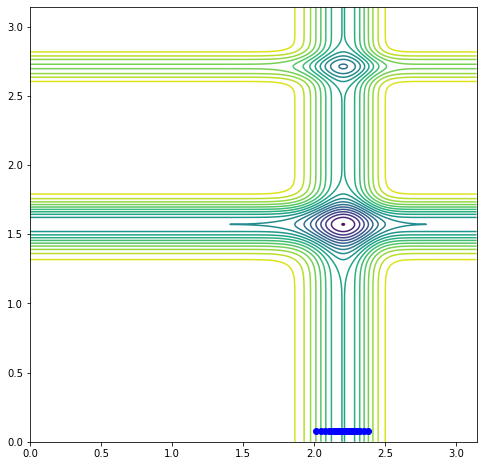

The best point is [2.208024149060493, 0.078573604868263] and value is -0.8008767410243458


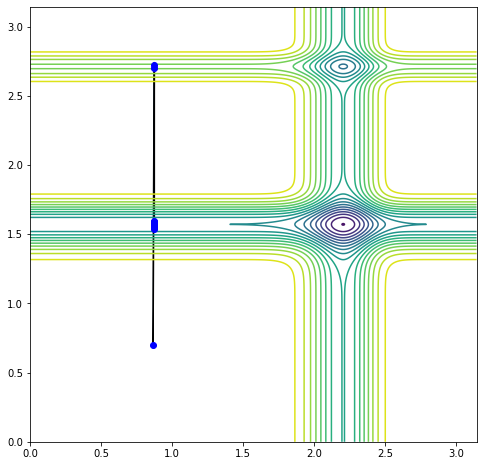

The best point is [0.8730097065226543, 1.5702377714611917] and value is -0.9999873691601274


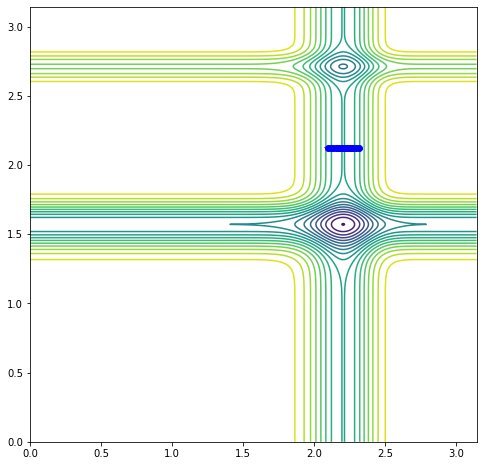

The best point is [2.201844416841441, 2.125914137606669] and value is -0.8012851190467649


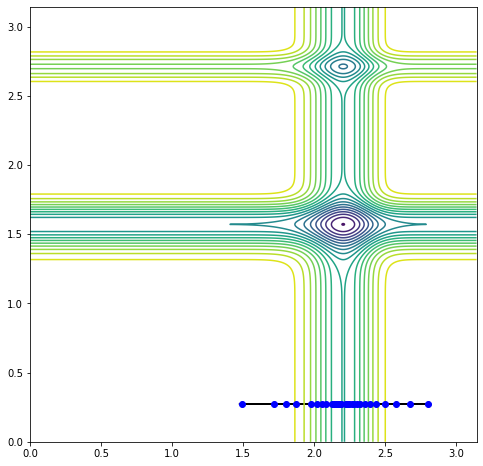

The best point is [2.18813507023814, 0.2731263979002464] and value is -0.7977878429859371


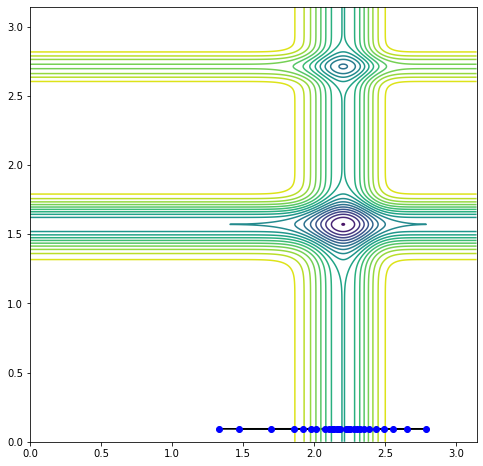

The best point is [2.220941405478435, 0.09361072568404477] and value is -0.7959920104375929


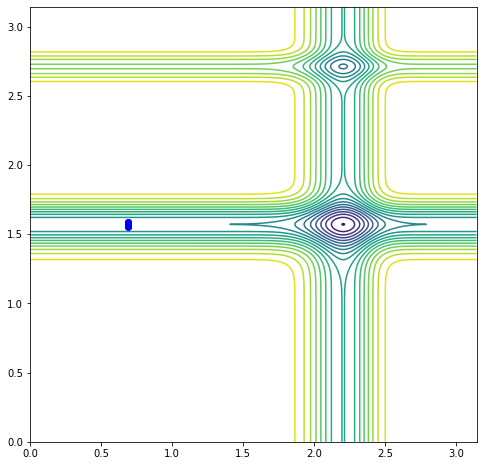

The best point is [0.6868714554387506, 1.5704971614534602] and value is -0.9999963759421346


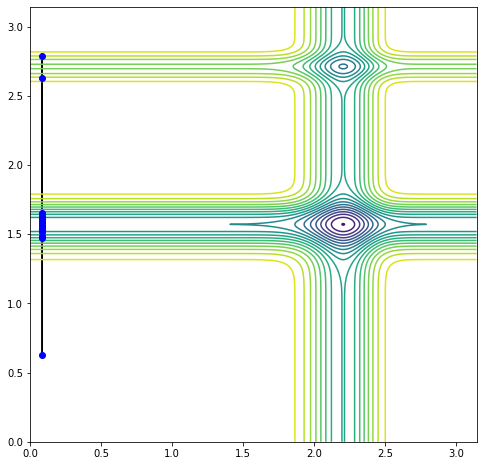

The best point is [0.08336520741470743, 1.5693387736303162] and value is -0.9999140417282181


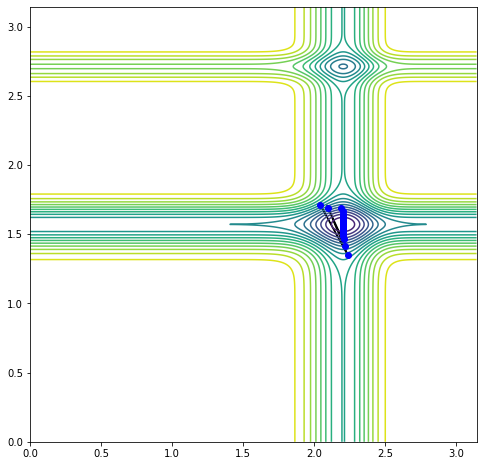

The best point is [2.202905020156827, 1.5665976864494466] and value is -1.8005915813197995


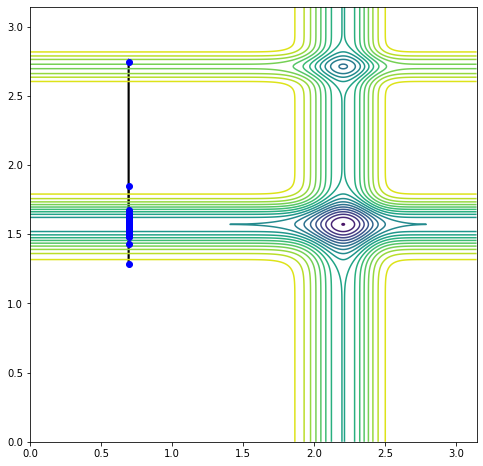

The best point is [0.692534638755817, 1.5670535427096697] and value is -0.9994341477430014


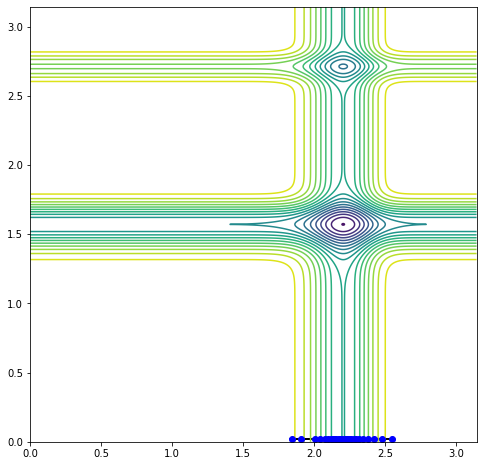

The best point is [2.192219783978477, 0.02041645566204206] and value is -0.7994582643172854


In [15]:
# Visualizing gradient decent

for start_point in rand_nums:
    gradient_decent(start_point, michal, x_range = (0, pi, 2000), y_range = (0, pi, 2000), iterr=30, plot=True, do_print=True)

# 2. Nelder-Mead Optimisation

### Algorithm

In [16]:
# Defining initial Triangle

def i_trg(x, y, c):
    x1 = x + c
    y1 = y
    x2 = x + c/2
    y2 = y + (c/2)*(3**(1/2))
    return list(zip(np.array([x,x1,x2]), np.array([y,y1,y2])))

In [17]:
# Function to get Best, Good, Worst (BGW) vertices

def BGW(V, f):
    T = [(V[i], f(V[i])) for i in range(len(V)) ]
    return sorted(T, key=lambda column: column[1])

In [18]:
# Defining triangle operations

def midpoint(o_trg, A=0, B=1):
    return ((o_trg[A][0][0] + o_trg[B][0][0])/2,
            (o_trg[A][0][1] + o_trg[B][0][1])/2)

def reflection(o_trg):
    M = midpoint(o_trg)
    W = o_trg[2][0]
    return (2*M[0] - W[0], 2*M[1] - W[1])

def expansion(o_trg):
    M = midpoint(o_trg)
    R = reflection(o_trg)
    return (2*R[0] - M[0], 2*R[1] - M[1])

def contraction(o_trg, f):
    M = midpoint(o_trg)
    R = reflection(o_trg)
    W = o_trg[2][0]
    insC = ((W[0] + M[0])/2, (W[1] + M[1])/2)
    outC = ((R[0] + M[0])/2, (R[1] + M[1])/2)
    return (insC, outC)

def shrink(o_trg, f):
    M, S  = midpoint(o_trg), midpoint(o_trg, A=0, B=2)
    return M, S

In [19]:
# Defining Nelder-mead Algorithm

def nelder_mead(o_trg, f, iterations, plot=False, do_print=False):
    
    if do_print:
        print("k \t {:^20}   \t {:^20}   \t {:^20}".format("Best point", "Good point", "Worst point"))
     
    for i in range(iterations):
        
        if (i == 0):
            if do_print:
                print("{} \t f({:.2f},{:.2f}) = {:.2f}   \t f({:.2f},{:.2f}) = {:.2f}   \t f({:.2f},{:.2f}) = {:.2f}"
                        .format(i+1, o_trg[0][0][0], o_trg[0][0][1], f(o_trg[0][0]),
                                o_trg[1][0][0], o_trg[1][0][1], f(o_trg[1][0]),
                                o_trg[2][0][0], o_trg[2][0][1], f(o_trg[2][0])))

            if plot:
                bgw = np.array([o_trg[i][0] for i in range(len(o_trg))])
                plt.clf()
                plt.contour(X, Y, Z, levels = 20)
                plt.plot((bgw[0,0], bgw[1,0]), (bgw[0,1], bgw[1,1]), '-c')
                plt.plot((bgw[2,0], bgw[1,0]), (bgw[2,1], bgw[1,1]), '-c')
                plt.plot((bgw[0,0], bgw[2,0]), (bgw[0,1], bgw[2,1]), '-c')
                plt.plot(bgw[0,0], bgw[0,1], '.r')
                plt.show(block=False)
                plt.pause(0.1)
        
        
        R = reflection(o_trg)
        G = o_trg[1][0]
        B = o_trg[0][0]
        
        if f(R) < f(G):
            # Case 1: reflection found a better point than Good point

            if f(B) < f(R):
                # Case 1a: reflected point is not better than Best point -> replace Worst with R and end this iteration
                
                o_trg = BGW([B, G, R], f)              
            else:
                # Case 1b: reflected point is better than Best point -> go even further (expansion)
                
                E = expansion(o_trg)
                if f(E) < f(B):
                    # Case 1ba: expanded point is better than reflected point -> replace Worst with E and end this iteration
                    o_trg = BGW([B, G, E], f)
                else:
                    # Case 1bb: expanded point is not better than reflected point -> replace Worst with R and end this iteration
                    o_trg = BGW([B, G, R], f)
        else:
            # Case 2: reflection found a worse point than Good point

            W = o_trg[2][0]
            if f(R) < f(W):
                # Case 2a: reflected point is worse than Worst point -> perform inside contraction
                C = contraction(o_trg, f)[0]
            else:
                # Case 2b: reflected point is not worse than Worst point -> perform outside contraction
                C = contraction(o_trg, f)[1]

            if f(C) < f(W):
                # Case 3a: contraction worked -> replace Worst with C and end this iteration
                o_trg = BGW([B, G, C], f)
            else:
                # Case 3b: contraction did not work -> shrink the triangle
                M, S = shrink(o_trg, f)
                o_trg = BGW([B, M, S], f)
        
        if do_print:
            print("{} \t f({:.2f},{:.2f}) = {:.2f}   \t f({:.2f},{:.2f}) = {:.2f}   \t f({:.2f},{:.2f}) = {:.2f}"
                  .format(i+1, o_trg[0][0][0], o_trg[0][0][1], f(o_trg[0][0]),
                          o_trg[1][0][0], o_trg[1][0][1], f(o_trg[1][0]),
                          o_trg[2][0][0], o_trg[2][0][1], f(o_trg[2][0])))

        if plot:
            bgw = np.array([o_trg[i][0] for i in range(len(o_trg))])
            plt.clf()
            plt.contour(X, Y, Z, levels = 20)
            plt.plot((bgw[0,0], bgw[1,0]), (bgw[0,1], bgw[1,1]), '-c')
            plt.plot((bgw[2,0], bgw[1,0]), (bgw[2,1], bgw[1,1]), '-c')
            plt.plot((bgw[0,0], bgw[2,0]), (bgw[0,1], bgw[2,1]), '-c')
            plt.plot(bgw[0,0], bgw[0,1], '.r')
            plt.show(block=False)
            plt.pause(0.1)
            
    plt.show()
                
    return list(o_trg[0][0]), f(list(o_trg[0][0]))

### Applying the algorithm on objective function

In [20]:
random.seed(42)
rand_nums2 = []
for i in range(10):
    x,y,c = random.uniform(0, pi), random.uniform(0, pi), random.uniform(0, pi)
    tri_points = (x,y,c)
    rand_nums2.append(tri_points)

In [21]:
start_time = time.time()

lst2 = []

for tups in rand_nums2:
    x,y,c = tups
    
    trg = i_trg(x,y,c)
    # print(f' Initial triangle co-ordinates :{trg}')

    o_trg = BGW(trg,michal)
    # print(f' Ordered triangle ordinates and value of function :{o_trg}\n')

    # algorithm
    bst_point, value = nelder_mead(o_trg,michal,20,plot=False)
    lst2.append([bst_point, value])
    
end_time = time.time()

nelder_time = end_time - start_time

In [22]:
nelder_res = pd.DataFrame(lst2, columns=['Best Point', 'Value'])
nelder_res.index += 1
nelder_res

Best Point     Value
1    [2.195756695121954, 0.3044582519232158] -0.800476
2   [2.1991347257548135, 1.5783330629413173] -1.798764
3     [2.216645291935226, 1.569198207405444] -1.798119
4     [4.189795546772878, 2.712998166836045] -0.412536
5    [2.20345060403961, 0.40532214623094615] -0.801299
6   [2.8612859769074417, 1.5742379647896674] -0.999520
7    [2.158682633907147, 1.5727472458031535] -1.770553
8    [2.203137638129219, 1.5712821923854436] -1.801293
9    [2.196801688094581, 1.5699954281777315] -1.800674
10   [2.209765765197611, 2.7104033502067706] -1.213224

In [23]:
# Results

# time required
print(f'Time required = {nelder_time} secs')

# Best result
nelder_res[nelder_res['Value'] == min(nelder_res['Value'])]

Time required = 0.017986536026000977 secs


Best Point     Value
8  [2.203137638129219, 1.5712821923854436] -1.801293

k 	      Best point        	      Good point        	     Worst point     
1 	 f(2.01,0.08) = -0.39   	 f(2.44,0.83) = -0.22   	 f(2.87,0.08) = -0.00


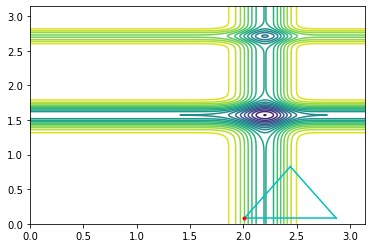

1 	 f(2.01,0.08) = -0.39   	 f(2.44,0.83) = -0.22   	 f(2.55,0.27) = -0.04


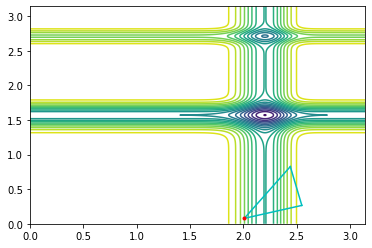

2 	 f(2.01,0.08) = -0.39   	 f(2.39,0.36) = -0.38   	 f(2.44,0.83) = -0.22


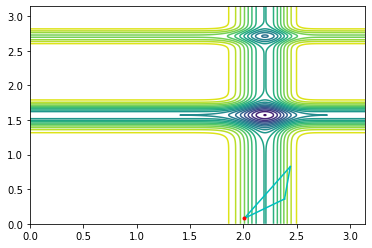

3 	 f(2.32,0.52) = -0.60   	 f(2.01,0.08) = -0.39   	 f(2.39,0.36) = -0.38


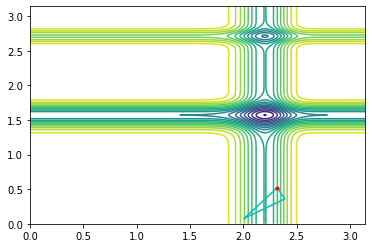

4 	 f(2.32,0.52) = -0.60   	 f(2.05,0.27) = -0.52   	 f(2.01,0.08) = -0.39


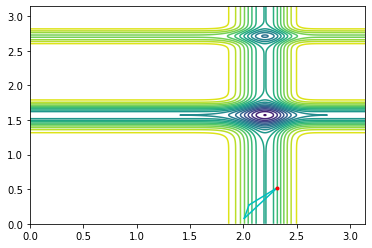

5 	 f(2.10,0.24) = -0.65   	 f(2.32,0.52) = -0.60   	 f(2.05,0.27) = -0.52


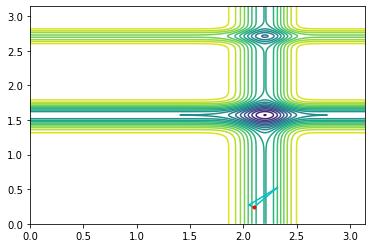

6 	 f(2.29,0.43) = -0.69   	 f(2.10,0.24) = -0.65   	 f(2.32,0.52) = -0.60


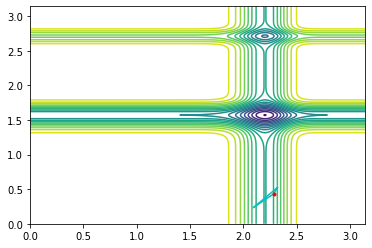

7 	 f(2.13,0.24) = -0.72   	 f(2.29,0.43) = -0.69   	 f(2.10,0.24) = -0.65


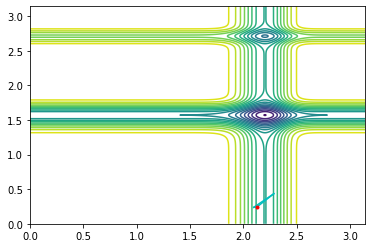

8 	 f(2.26,0.39) = -0.75   	 f(2.13,0.24) = -0.72   	 f(2.29,0.43) = -0.69


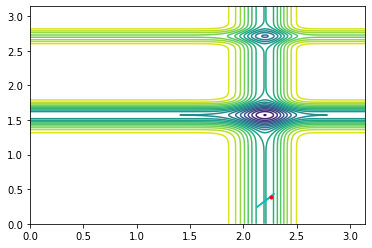

9 	 f(2.15,0.26) = -0.76   	 f(2.26,0.39) = -0.75   	 f(2.13,0.24) = -0.72


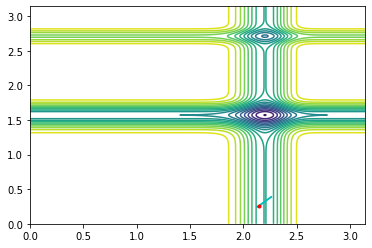

10 	 f(2.24,0.36) = -0.77   	 f(2.15,0.26) = -0.76   	 f(2.26,0.39) = -0.75


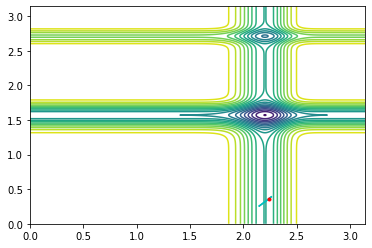

11 	 f(2.16,0.27) = -0.78   	 f(2.24,0.36) = -0.77   	 f(2.15,0.26) = -0.76


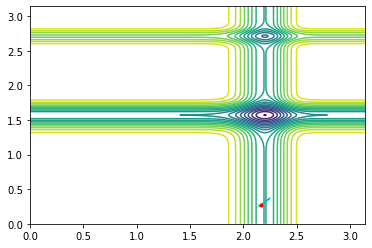

12 	 f(2.23,0.35) = -0.79   	 f(2.16,0.27) = -0.78   	 f(2.24,0.36) = -0.77


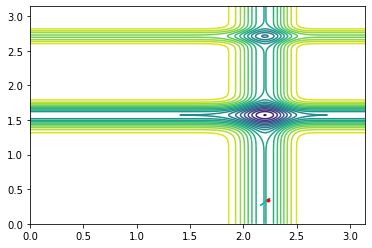

13 	 f(2.18,0.28) = -0.79   	 f(2.23,0.35) = -0.79   	 f(2.16,0.27) = -0.78


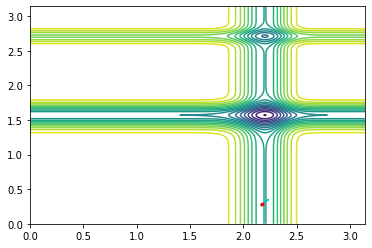

14 	 f(2.22,0.34) = -0.79   	 f(2.18,0.28) = -0.79   	 f(2.23,0.35) = -0.79


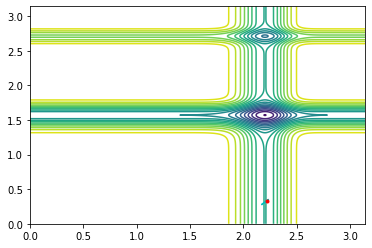

15 	 f(2.18,0.29) = -0.79   	 f(2.22,0.34) = -0.79   	 f(2.18,0.28) = -0.79


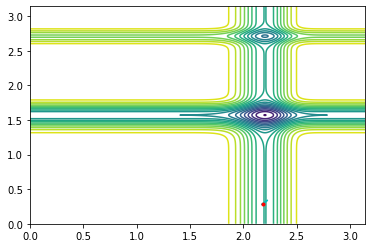

16 	 f(2.22,0.33) = -0.80   	 f(2.18,0.29) = -0.79   	 f(2.22,0.34) = -0.79


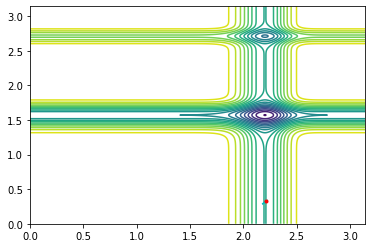

17 	 f(2.22,0.33) = -0.80   	 f(2.19,0.30) = -0.80   	 f(2.18,0.29) = -0.79


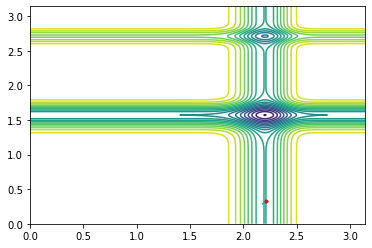

18 	 f(2.19,0.30) = -0.80   	 f(2.22,0.33) = -0.80   	 f(2.19,0.30) = -0.80


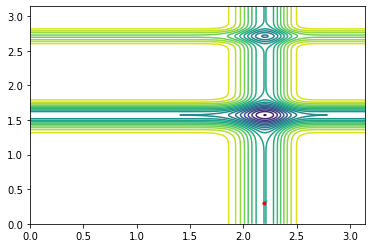

19 	 f(2.21,0.32) = -0.80   	 f(2.19,0.30) = -0.80   	 f(2.22,0.33) = -0.80


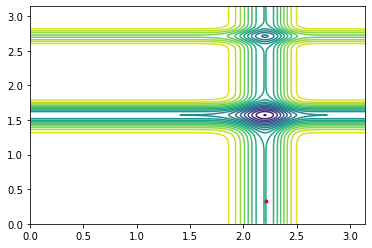

20 	 f(2.20,0.30) = -0.80   	 f(2.21,0.32) = -0.80   	 f(2.19,0.30) = -0.80


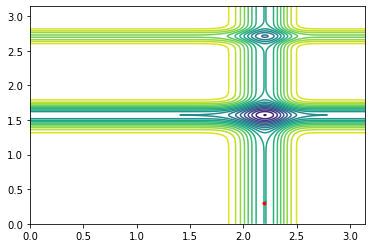

k 	      Best point        	      Good point        	     Worst point     
1 	 f(2.83,2.31) = -0.00   	 f(0.70,2.31) = -0.00   	 f(1.76,4.15) = 0.82


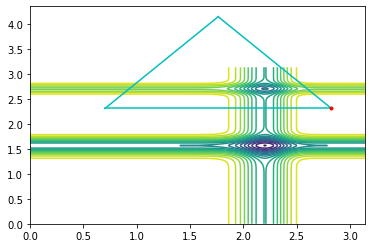

1 	 f(1.76,0.47) = -0.03   	 f(2.83,2.31) = -0.00   	 f(0.70,2.31) = -0.00


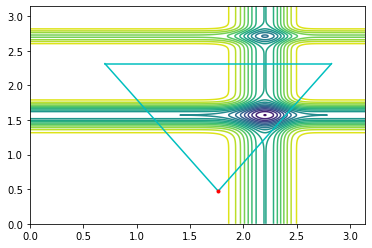

2 	 f(1.76,0.47) = -0.03   	 f(2.83,2.31) = -0.00   	 f(3.09,0.93) = -0.00


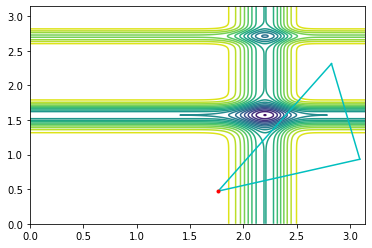

3 	 f(1.76,0.47) = -0.03   	 f(1.50,1.85) = -0.02   	 f(2.83,2.31) = -0.00


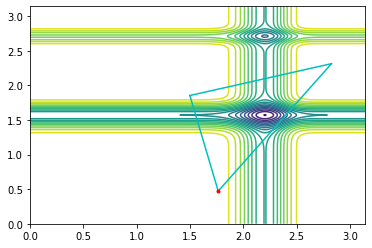

4 	 f(2.30,1.39) = -0.98   	 f(1.76,0.47) = -0.03   	 f(1.63,1.16) = -0.01


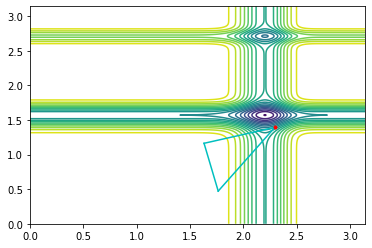

5 	 f(2.30,1.39) = -0.98   	 f(2.43,0.70) = -0.25   	 f(1.76,0.47) = -0.03


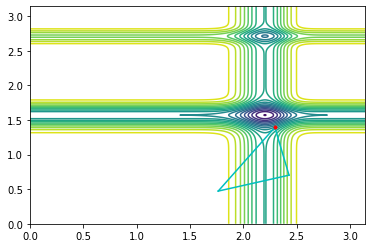

6 	 f(2.30,1.39) = -0.98   	 f(2.96,1.62) = -0.89   	 f(2.43,0.70) = -0.25


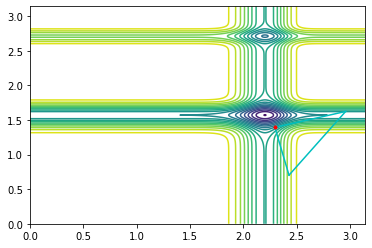

7 	 f(2.30,1.39) = -0.98   	 f(2.63,1.51) = -0.87   	 f(2.36,1.05) = -0.46


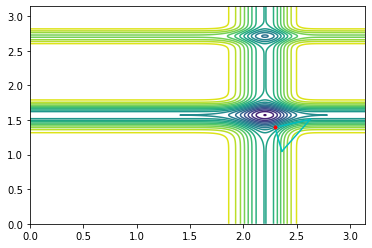

8 	 f(2.30,1.39) = -0.98   	 f(2.63,1.51) = -0.87   	 f(2.51,1.65) = -0.84


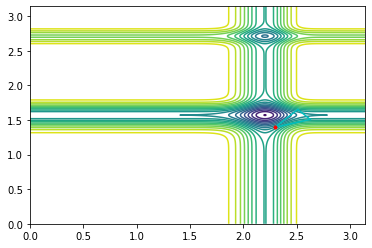

9 	 f(2.40,1.52) = -1.24   	 f(2.30,1.39) = -0.98   	 f(2.46,1.45) = -0.75


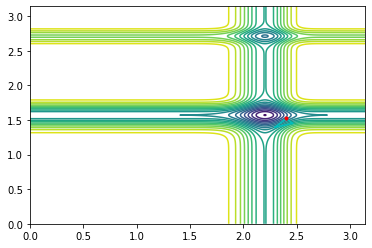

10 	 f(2.13,1.47) = -1.40   	 f(2.40,1.52) = -1.24   	 f(2.30,1.39) = -0.98


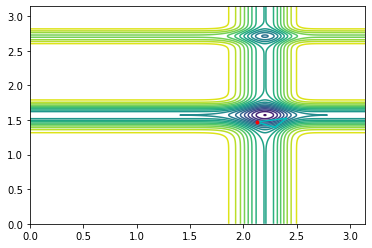

11 	 f(2.23,1.60) = -1.75   	 f(2.13,1.47) = -1.40   	 f(2.40,1.52) = -1.24


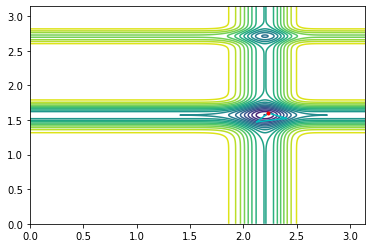

12 	 f(2.23,1.60) = -1.75   	 f(2.29,1.53) = -1.61   	 f(2.13,1.47) = -1.40


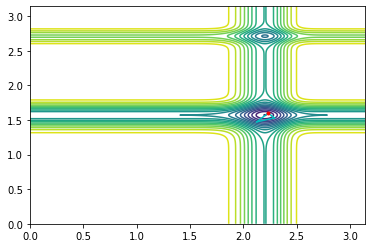

13 	 f(2.23,1.60) = -1.75   	 f(2.29,1.53) = -1.61   	 f(2.33,1.61) = -1.49


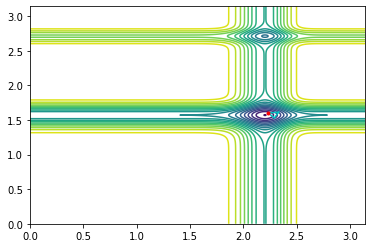

14 	 f(2.23,1.60) = -1.75   	 f(2.19,1.52) = -1.70   	 f(2.29,1.53) = -1.61


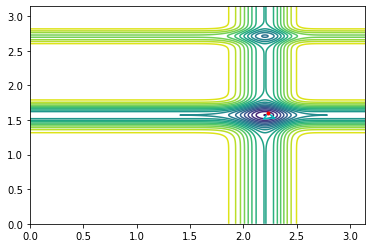

15 	 f(2.23,1.60) = -1.75   	 f(2.14,1.59) = -1.72   	 f(2.19,1.52) = -1.70


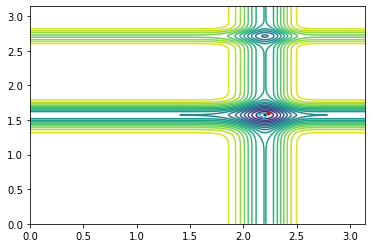

16 	 f(2.21,1.56) = -1.80   	 f(2.18,1.60) = -1.77   	 f(2.23,1.60) = -1.75


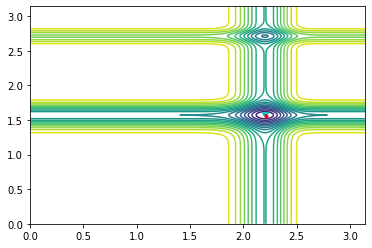

17 	 f(2.21,1.56) = -1.80   	 f(2.22,1.59) = -1.78   	 f(2.18,1.60) = -1.77


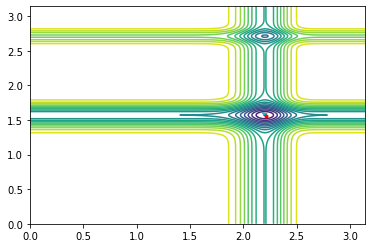

18 	 f(2.21,1.56) = -1.80   	 f(2.23,1.56) = -1.79   	 f(2.22,1.59) = -1.78


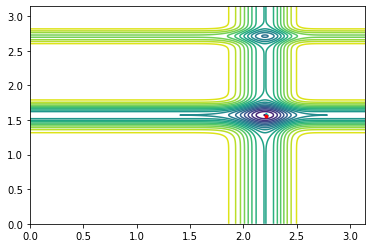

19 	 f(2.21,1.58) = -1.80   	 f(2.21,1.56) = -1.80   	 f(2.22,1.56) = -1.79


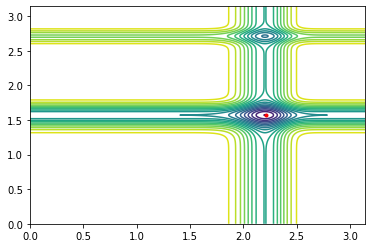

20 	 f(2.20,1.58) = -1.80   	 f(2.21,1.58) = -1.80   	 f(2.21,1.56) = -1.80


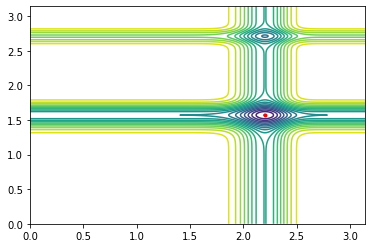

k 	      Best point        	      Good point        	     Worst point     
1 	 f(3.47,1.42) = -0.43   	 f(2.80,0.27) = -0.00   	 f(4.13,0.27) = 0.00


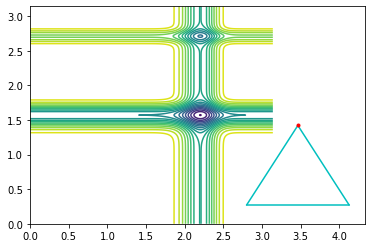

1 	 f(2.14,1.42) = -1.17   	 f(3.47,1.42) = -0.43   	 f(2.80,0.27) = -0.00


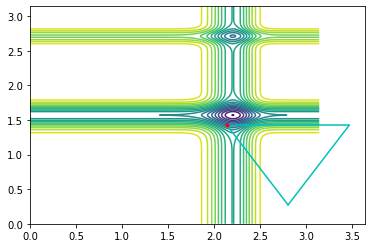

2 	 f(2.14,1.42) = -1.17   	 f(3.47,1.42) = -0.43   	 f(2.80,0.85) = -0.00


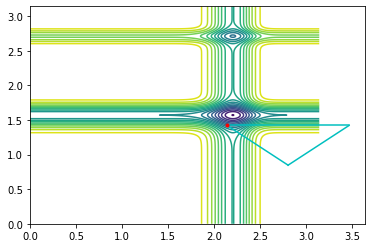

3 	 f(2.14,1.42) = -1.17   	 f(3.47,1.42) = -0.43   	 f(2.80,1.13) = -0.00


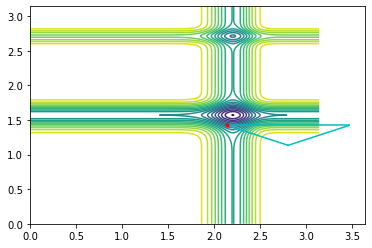

4 	 f(2.14,1.42) = -1.17   	 f(3.47,1.42) = -0.43   	 f(2.80,1.28) = -0.05


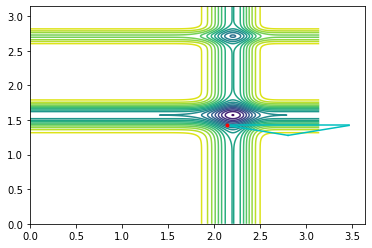

5 	 f(2.14,1.42) = -1.17   	 f(2.80,1.56) = -1.00   	 f(3.47,1.42) = -0.43


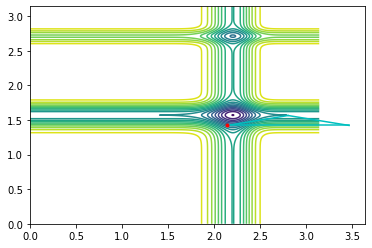

6 	 f(2.14,1.42) = -1.17   	 f(1.48,1.56) = -1.00   	 f(2.80,1.56) = -1.00


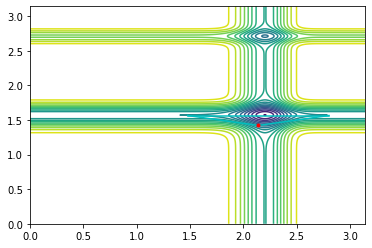

7 	 f(2.14,1.42) = -1.17   	 f(2.47,1.49) = -0.94   	 f(1.81,1.49) = -0.84


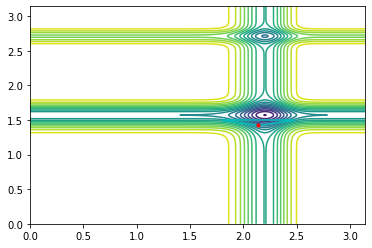

8 	 f(2.31,1.46) = -1.25   	 f(2.14,1.42) = -1.17   	 f(1.97,1.46) = -0.91


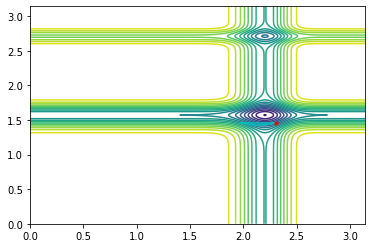

9 	 f(2.31,1.46) = -1.25   	 f(2.14,1.42) = -1.17   	 f(2.35,1.43) = -0.99


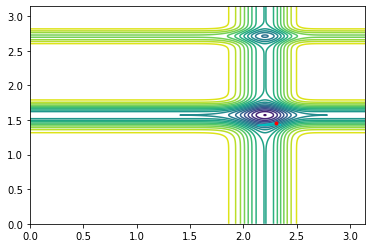

10 	 f(2.31,1.46) = -1.25   	 f(2.10,1.45) = -1.21   	 f(2.14,1.42) = -1.17


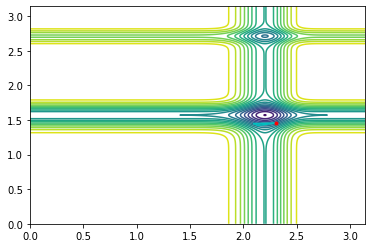

11 	 f(2.33,1.52) = -1.46   	 f(2.31,1.46) = -1.25   	 f(2.10,1.45) = -1.21


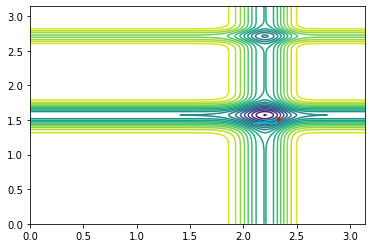

12 	 f(2.21,1.48) = -1.54   	 f(2.33,1.52) = -1.46   	 f(2.32,1.49) = -1.37


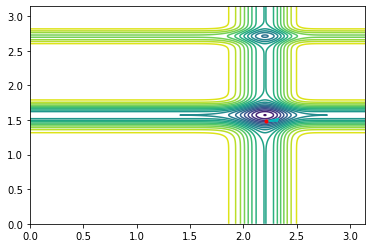

13 	 f(2.18,1.52) = -1.70   	 f(2.21,1.48) = -1.54   	 f(2.33,1.52) = -1.46


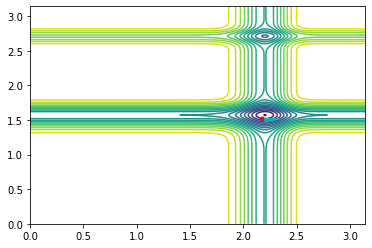

14 	 f(2.18,1.52) = -1.70   	 f(2.21,1.48) = -1.54   	 f(2.13,1.50) = -1.52


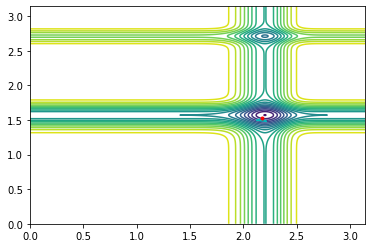

15 	 f(2.18,1.52) = -1.70   	 f(2.26,1.51) = -1.61   	 f(2.21,1.48) = -1.54


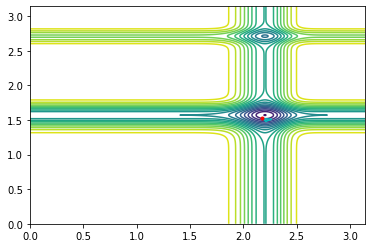

16 	 f(2.23,1.58) = -1.78   	 f(2.18,1.52) = -1.70   	 f(2.26,1.51) = -1.61


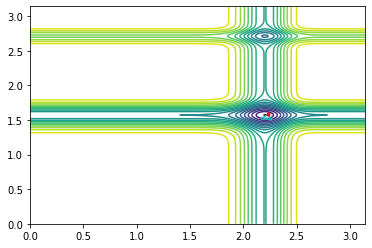

17 	 f(2.23,1.58) = -1.78   	 f(2.15,1.60) = -1.72   	 f(2.18,1.52) = -1.70


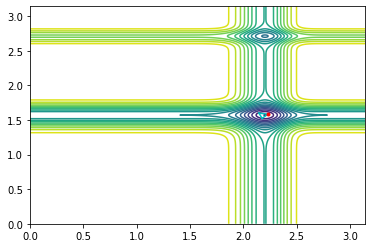

18 	 f(2.20,1.55) = -1.79   	 f(2.23,1.58) = -1.78   	 f(2.19,1.59) = -1.78


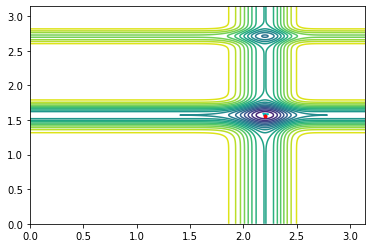

19 	 f(2.20,1.55) = -1.79   	 f(2.23,1.56) = -1.78   	 f(2.23,1.58) = -1.78


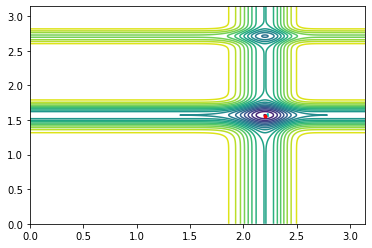

20 	 f(2.22,1.57) = -1.80   	 f(2.20,1.55) = -1.79   	 f(2.22,1.56) = -1.79


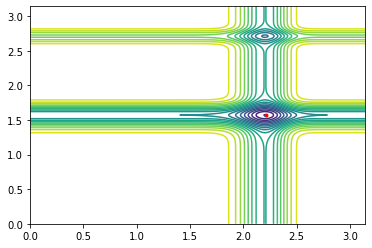

k 	      Best point        	      Good point        	     Worst point     
1 	 f(1.68,0.69) = -0.01   	 f(0.89,2.06) = -0.00   	 f(0.09,0.69) = -0.00


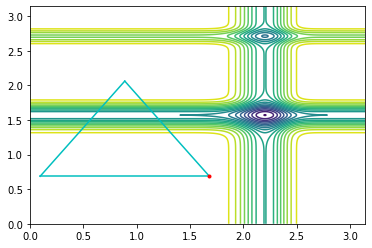

1 	 f(3.67,2.75) = -0.28   	 f(1.68,0.69) = -0.01   	 f(0.89,2.06) = -0.00


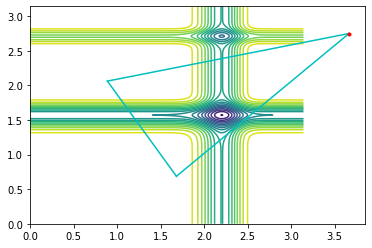

2 	 f(3.67,2.75) = -0.28   	 f(4.46,1.37) = -0.24   	 f(1.68,0.69) = -0.01


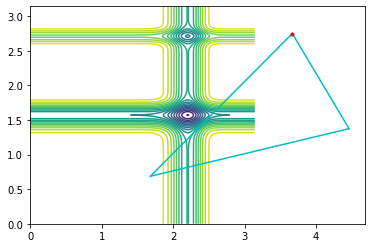

3 	 f(5.25,2.75) = -0.35   	 f(3.67,2.75) = -0.28   	 f(4.46,1.37) = -0.24


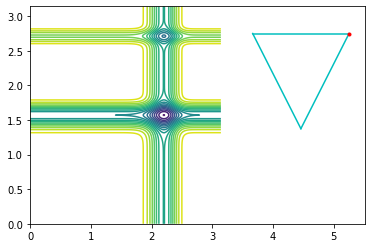

4 	 f(4.46,2.75) = -0.35   	 f(5.25,2.75) = -0.35   	 f(4.86,2.06) = 0.29


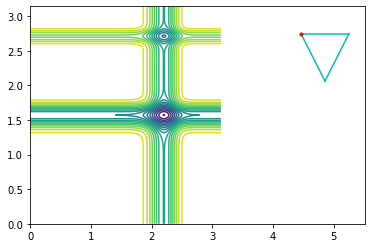

5 	 f(4.46,2.75) = -0.35   	 f(4.86,2.75) = -0.06   	 f(4.66,2.41) = 0.00


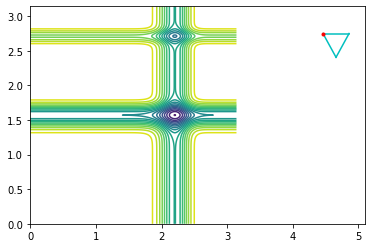

6 	 f(4.46,2.75) = -0.35   	 f(4.86,2.75) = -0.06   	 f(4.66,2.92) = -0.00


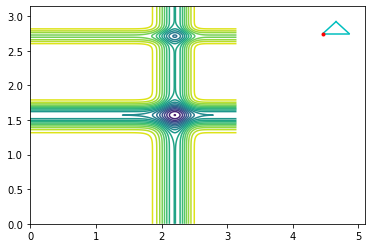

7 	 f(4.46,2.75) = -0.35   	 f(4.66,2.84) = -0.06   	 f(4.86,2.75) = -0.06


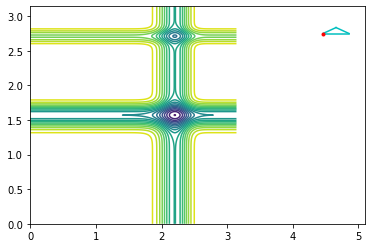

8 	 f(4.46,2.75) = -0.35   	 f(4.26,2.84) = -0.06   	 f(4.66,2.84) = -0.06


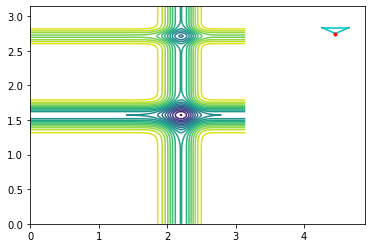

9 	 f(4.46,2.75) = -0.35   	 f(4.06,2.75) = -0.31   	 f(4.26,2.84) = -0.06


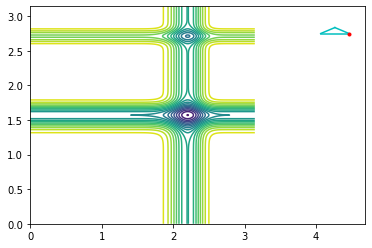

10 	 f(4.46,2.75) = -0.35   	 f(4.26,2.66) = -0.31   	 f(4.06,2.75) = -0.31


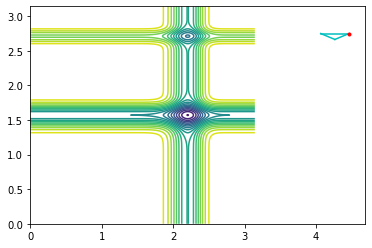

11 	 f(4.21,2.73) = -0.40   	 f(4.46,2.75) = -0.35   	 f(4.26,2.66) = -0.31


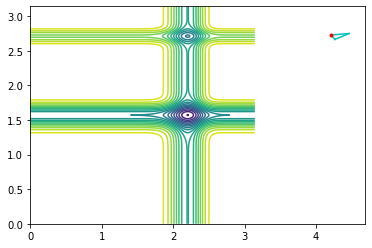

12 	 f(4.24,2.70) = -0.40   	 f(4.21,2.73) = -0.40   	 f(4.34,2.74) = -0.38


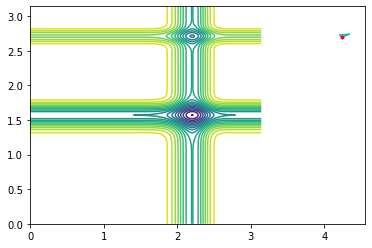

13 	 f(4.17,2.70) = -0.40   	 f(4.24,2.70) = -0.40   	 f(4.21,2.73) = -0.40


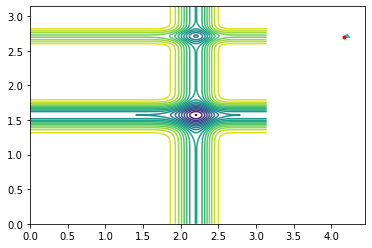

14 	 f(4.19,2.71) = -0.41   	 f(4.17,2.70) = -0.40   	 f(4.20,2.70) = -0.40


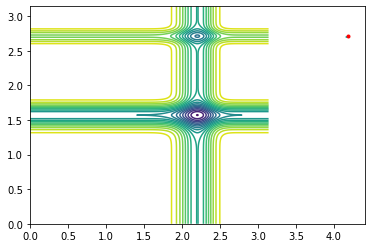

15 	 f(4.19,2.71) = -0.41   	 f(4.16,2.71) = -0.41   	 f(4.17,2.70) = -0.40


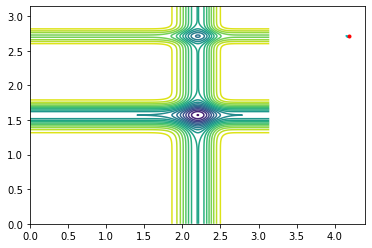

16 	 f(4.19,2.71) = -0.41   	 f(4.16,2.71) = -0.41   	 f(4.18,2.72) = -0.41


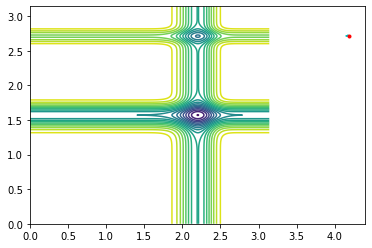

17 	 f(4.19,2.71) = -0.41   	 f(4.16,2.71) = -0.41   	 f(4.17,2.72) = -0.41


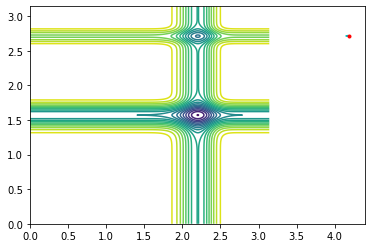

18 	 f(4.19,2.71) = -0.41   	 f(4.17,2.71) = -0.41   	 f(4.16,2.71) = -0.41


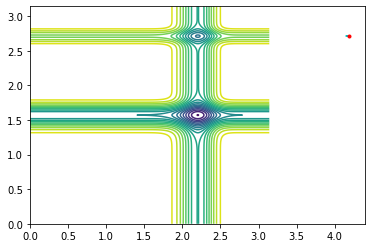

19 	 f(4.19,2.71) = -0.41   	 f(4.17,2.71) = -0.41   	 f(4.17,2.71) = -0.41


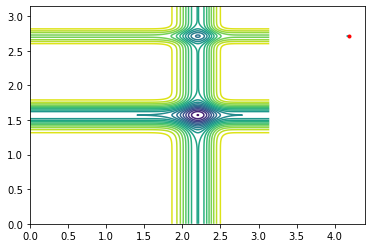

20 	 f(4.19,2.71) = -0.41   	 f(4.19,2.71) = -0.41   	 f(4.17,2.71) = -0.41


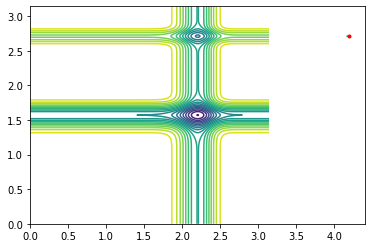

k 	      Best point        	      Good point        	     Worst point     
1 	 f(2.13,0.62) = -0.71   	 f(1.10,2.39) = -0.00   	 f(0.08,0.62) = -0.00


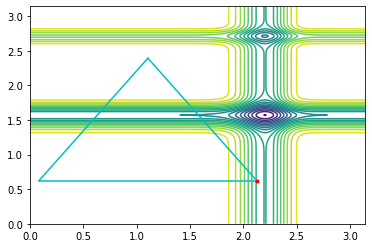

1 	 f(2.13,0.62) = -0.71   	 f(0.85,1.07) = -0.00   	 f(1.10,2.39) = -0.00


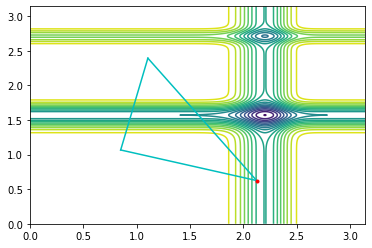

2 	 f(2.13,0.62) = -0.71   	 f(1.87,-0.70) = -0.11   	 f(0.85,1.07) = -0.00


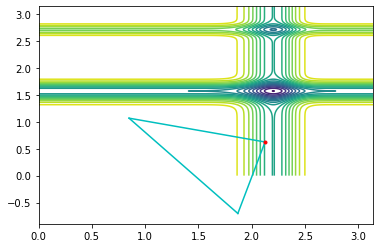

3 	 f(2.13,0.62) = -0.71   	 f(1.87,-0.70) = -0.11   	 f(2.57,-0.59) = -0.03


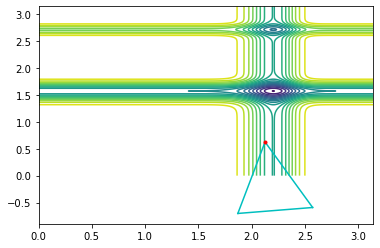

4 	 f(2.13,0.62) = -0.71   	 f(2.35,0.02) = -0.51   	 f(2.00,-0.04) = -0.36


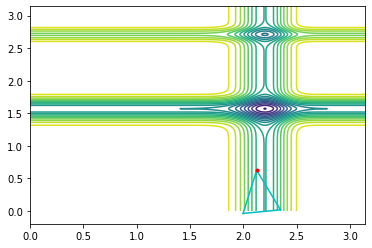

5 	 f(2.13,0.62) = -0.71   	 f(2.35,0.02) = -0.51   	 f(2.36,0.50) = -0.48


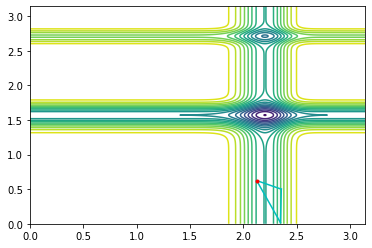

6 	 f(2.13,0.62) = -0.71   	 f(2.12,0.14) = -0.69   	 f(2.35,0.02) = -0.51


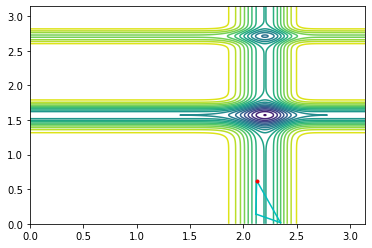

7 	 f(2.24,0.32) = -0.78   	 f(2.13,0.62) = -0.71   	 f(2.12,0.38) = -0.70


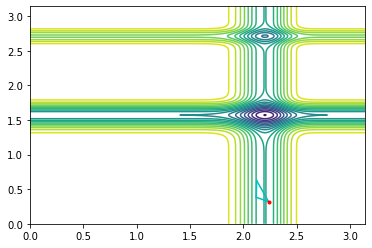

8 	 f(2.24,0.32) = -0.78   	 f(2.24,0.56) = -0.78   	 f(2.13,0.62) = -0.71


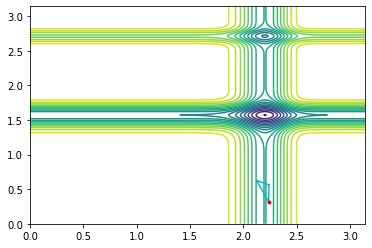

9 	 f(2.18,0.47) = -0.79   	 f(2.24,0.32) = -0.78   	 f(2.24,0.44) = -0.78


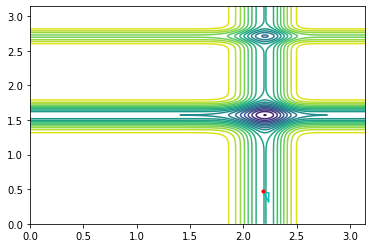

10 	 f(2.18,0.47) = -0.79   	 f(2.18,0.35) = -0.79   	 f(2.24,0.32) = -0.78


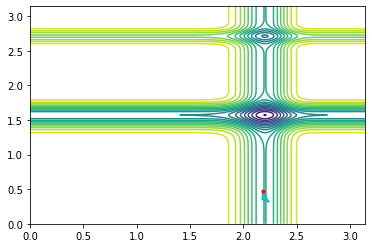

11 	 f(2.21,0.40) = -0.80   	 f(2.18,0.47) = -0.79   	 f(2.18,0.41) = -0.79


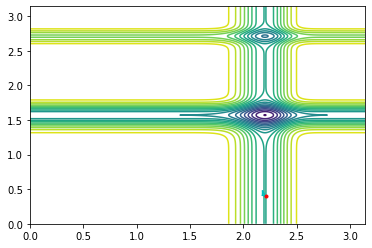

12 	 f(2.21,0.40) = -0.80   	 f(2.21,0.46) = -0.80   	 f(2.18,0.47) = -0.79


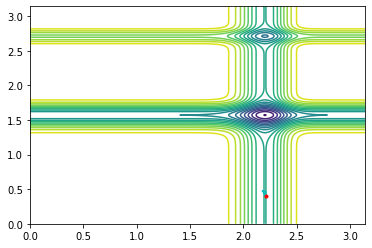

13 	 f(2.21,0.40) = -0.80   	 f(2.21,0.46) = -0.80   	 f(2.22,0.40) = -0.79


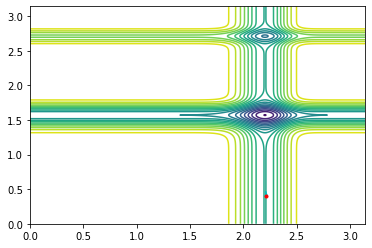

14 	 f(2.21,0.40) = -0.80   	 f(2.21,0.46) = -0.80   	 f(2.22,0.42) = -0.80


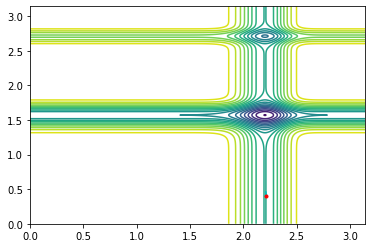

15 	 f(2.20,0.44) = -0.80   	 f(2.21,0.40) = -0.80   	 f(2.21,0.46) = -0.80


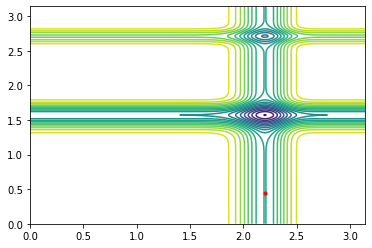

16 	 f(2.20,0.44) = -0.80   	 f(2.20,0.38) = -0.80   	 f(2.21,0.40) = -0.80


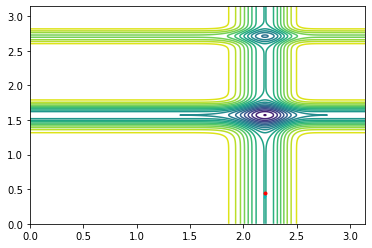

17 	 f(2.20,0.44) = -0.80   	 f(2.20,0.38) = -0.80   	 f(2.20,0.41) = -0.80


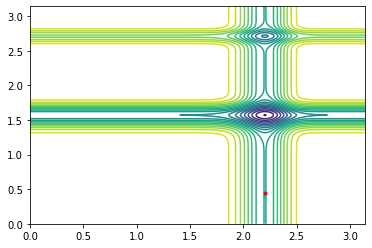

18 	 f(2.20,0.44) = -0.80   	 f(2.20,0.38) = -0.80   	 f(2.20,0.41) = -0.80


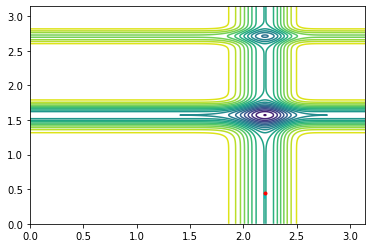

19 	 f(2.20,0.41) = -0.80   	 f(2.20,0.44) = -0.80   	 f(2.20,0.38) = -0.80


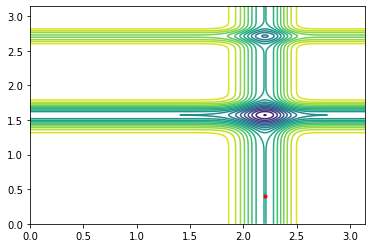

20 	 f(2.20,0.41) = -0.80   	 f(2.20,0.44) = -0.80   	 f(2.20,0.40) = -0.80


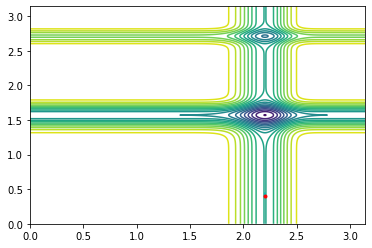

k 	      Best point        	      Good point        	     Worst point     
1 	 f(1.71,0.69) = -0.01   	 f(2.64,2.30) = -0.01   	 f(3.56,0.69) = 0.00


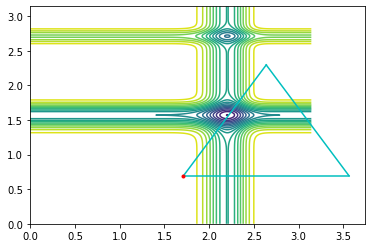

1 	 f(1.71,0.69) = -0.01   	 f(2.64,2.30) = -0.01   	 f(2.87,1.09) = -0.00


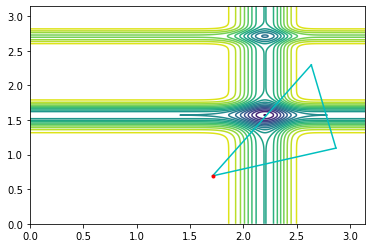

2 	 f(2.52,1.29) = -0.14   	 f(1.71,0.69) = -0.01   	 f(2.64,2.30) = -0.01


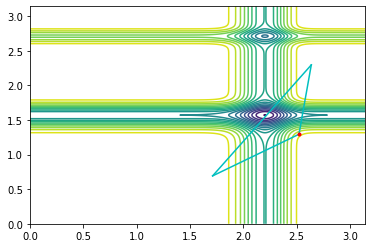

3 	 f(2.52,1.29) = -0.14   	 f(1.86,0.34) = -0.09   	 f(1.71,0.69) = -0.01


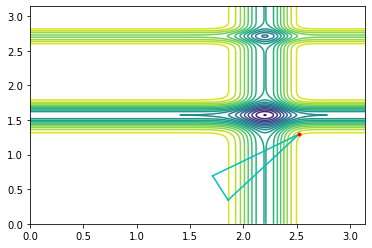

4 	 f(2.43,0.88) = -0.25   	 f(2.52,1.29) = -0.14   	 f(1.86,0.34) = -0.09


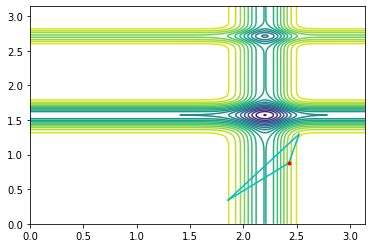

5 	 f(2.78,1.46) = -0.63   	 f(2.43,0.88) = -0.25   	 f(2.52,1.29) = -0.14


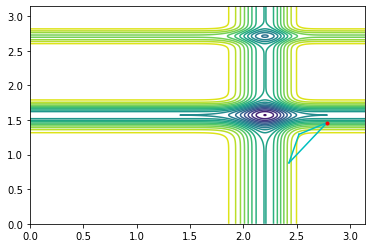

6 	 f(2.78,1.46) = -0.63   	 f(2.65,1.38) = -0.26   	 f(2.61,1.17) = -0.02


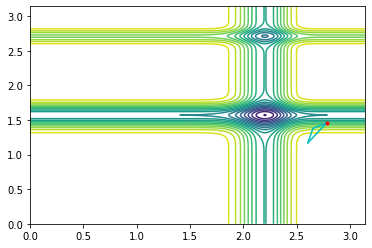

7 	 f(2.83,1.67) = -0.67   	 f(2.78,1.46) = -0.63   	 f(2.65,1.38) = -0.26


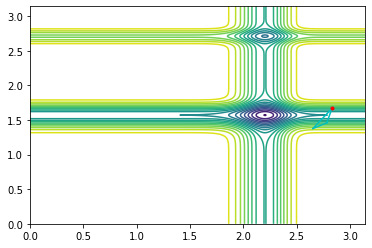

8 	 f(2.88,1.66) = -0.73   	 f(2.83,1.67) = -0.67   	 f(2.78,1.46) = -0.63


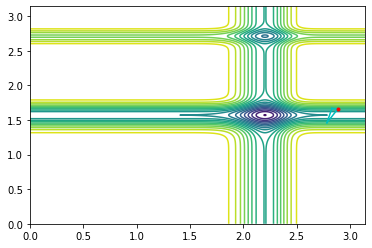

9 	 f(2.83,1.56) = -0.99   	 f(2.88,1.66) = -0.73   	 f(2.86,1.66) = -0.70


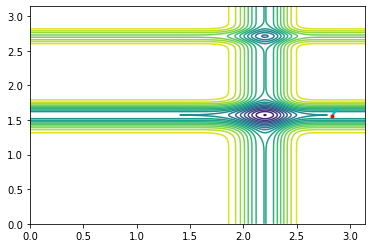

10 	 f(2.83,1.56) = -0.99   	 f(2.86,1.55) = -0.99   	 f(2.88,1.66) = -0.73


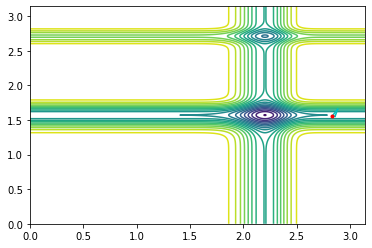

11 	 f(2.83,1.56) = -0.99   	 f(2.86,1.55) = -0.99   	 f(2.83,1.51) = -0.84


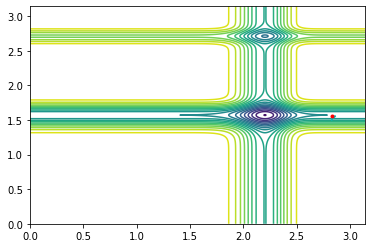

12 	 f(2.83,1.56) = -0.99   	 f(2.86,1.55) = -0.99   	 f(2.84,1.53) = -0.94


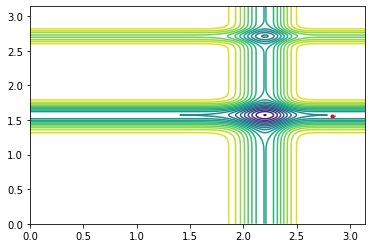

13 	 f(2.86,1.58) = -1.00   	 f(2.83,1.56) = -0.99   	 f(2.86,1.55) = -0.99


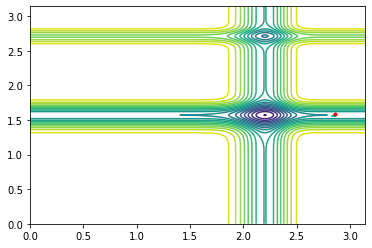

14 	 f(2.85,1.56) = -1.00   	 f(2.86,1.58) = -1.00   	 f(2.83,1.56) = -0.99


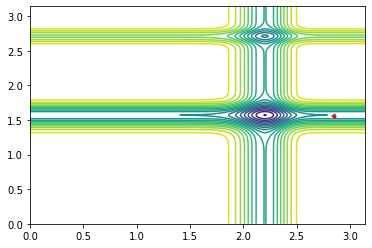

15 	 f(2.87,1.58) = -1.00   	 f(2.85,1.56) = -1.00   	 f(2.86,1.58) = -1.00


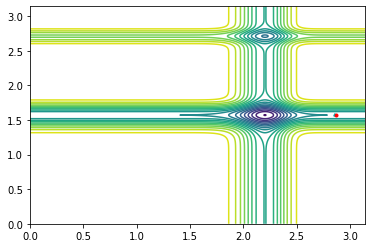

16 	 f(2.87,1.58) = -1.00   	 f(2.86,1.56) = -1.00   	 f(2.85,1.56) = -1.00


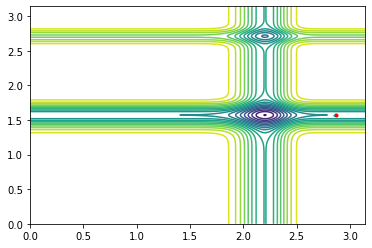

17 	 f(2.86,1.57) = -1.00   	 f(2.87,1.58) = -1.00   	 f(2.86,1.56) = -1.00


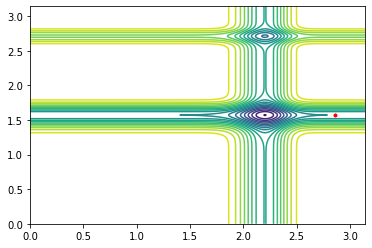

18 	 f(2.86,1.58) = -1.00   	 f(2.86,1.57) = -1.00   	 f(2.87,1.58) = -1.00


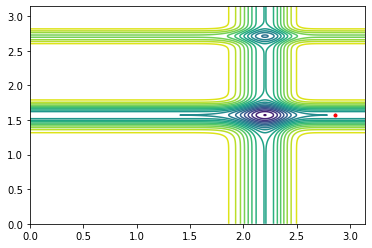

19 	 f(2.86,1.57) = -1.00   	 f(2.86,1.58) = -1.00   	 f(2.86,1.57) = -1.00


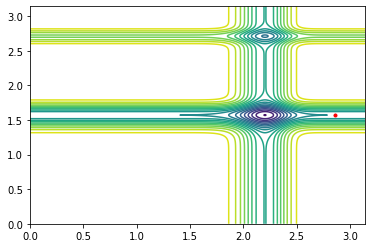

20 	 f(2.86,1.57) = -1.00   	 f(2.86,1.57) = -1.00   	 f(2.86,1.58) = -1.00


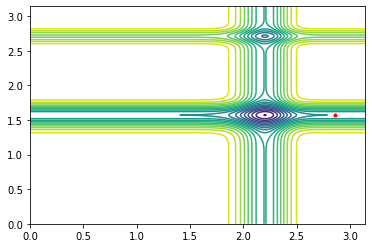

k 	      Best point        	      Good point        	     Worst point     
1 	 f(2.54,0.02) = -0.05   	 f(5.07,0.02) = 0.28   	 f(3.81,2.21) = 0.57


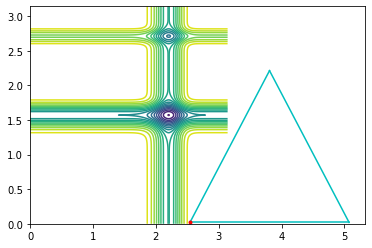

1 	 f(2.54,0.02) = -0.05   	 f(3.18,1.12) = -0.00   	 f(3.81,0.02) = 0.57


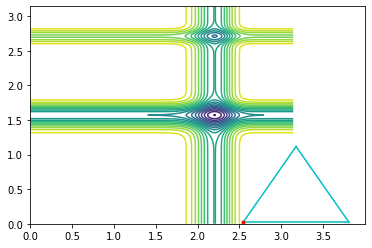

2 	 f(0.96,1.66) = -0.68   	 f(2.54,0.02) = -0.05   	 f(3.18,1.12) = -0.00


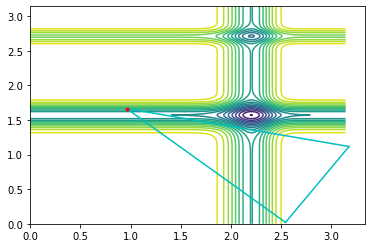

3 	 f(2.07,1.39) = -0.87   	 f(0.96,1.66) = -0.68   	 f(1.75,0.84) = -0.02


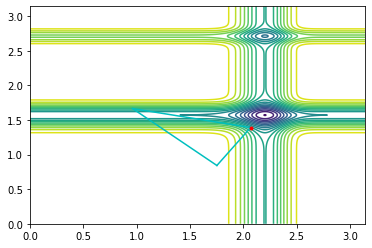

4 	 f(1.51,1.53) = -0.93   	 f(2.07,1.39) = -0.87   	 f(1.91,1.12) = -0.17


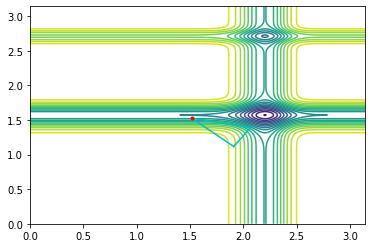

5 	 f(1.51,1.53) = -0.93   	 f(1.73,1.63) = -0.88   	 f(2.07,1.39) = -0.87


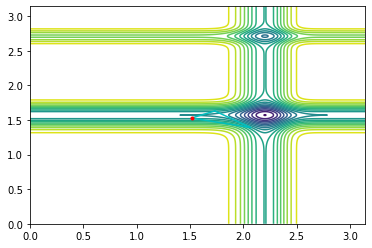

6 	 f(1.62,1.58) = -1.00   	 f(1.51,1.53) = -0.93   	 f(1.79,1.46) = -0.66


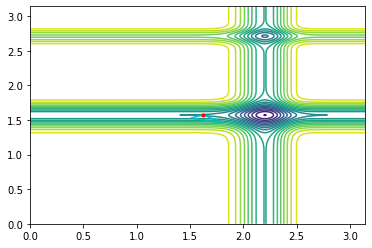

7 	 f(1.62,1.58) = -1.00   	 f(1.51,1.53) = -0.93   	 f(1.68,1.51) = -0.86


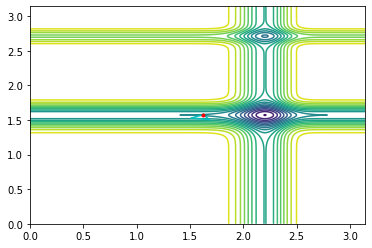

8 	 f(1.62,1.58) = -1.00   	 f(1.46,1.60) = -0.96   	 f(1.51,1.53) = -0.93


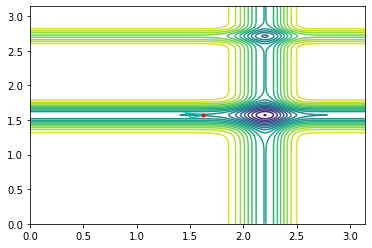

9 	 f(1.62,1.58) = -1.00   	 f(1.57,1.55) = -0.99   	 f(1.54,1.59) = -0.99


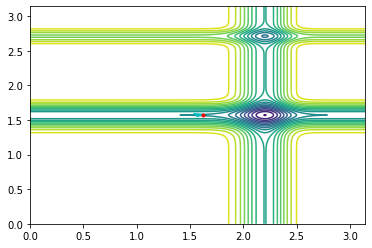

10 	 f(1.62,1.58) = -1.00   	 f(1.62,1.55) = -0.99   	 f(1.57,1.55) = -0.99


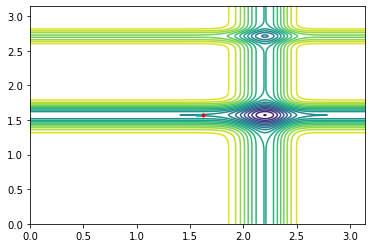

11 	 f(1.68,1.58) = -1.00   	 f(1.62,1.58) = -1.00   	 f(1.62,1.55) = -0.99


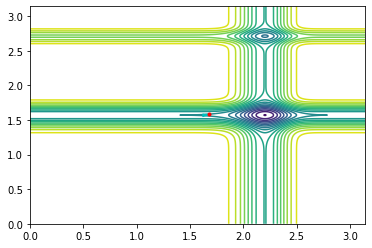

12 	 f(1.65,1.57) = -1.00   	 f(1.68,1.58) = -1.00   	 f(1.65,1.58) = -1.00


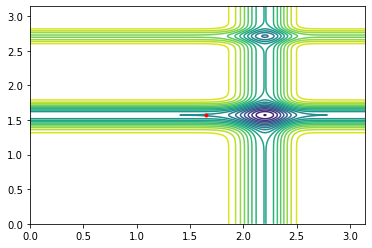

13 	 f(1.69,1.56) = -1.01   	 f(1.65,1.57) = -1.00   	 f(1.68,1.58) = -1.00


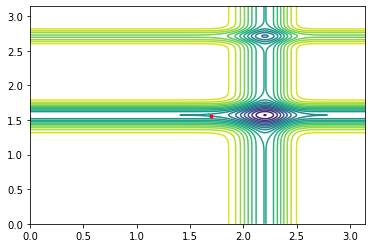

14 	 f(1.69,1.57) = -1.01   	 f(1.69,1.56) = -1.01   	 f(1.67,1.56) = -1.00


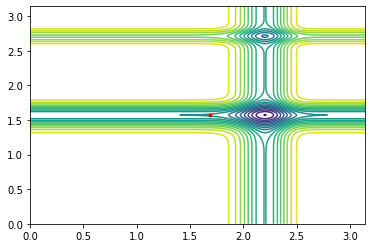

15 	 f(1.72,1.57) = -1.01   	 f(1.69,1.57) = -1.01   	 f(1.69,1.56) = -1.01


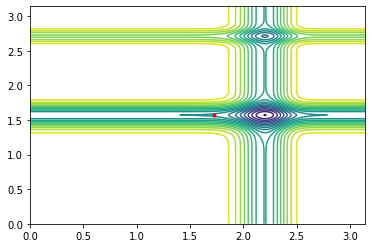

16 	 f(1.72,1.57) = -1.01   	 f(1.72,1.58) = -1.01   	 f(1.69,1.57) = -1.01


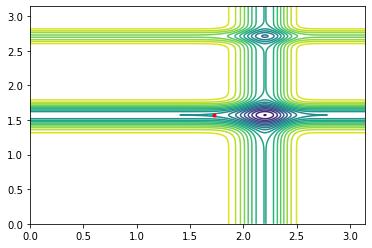

17 	 f(1.79,1.58) = -1.03   	 f(1.72,1.57) = -1.01   	 f(1.72,1.58) = -1.01


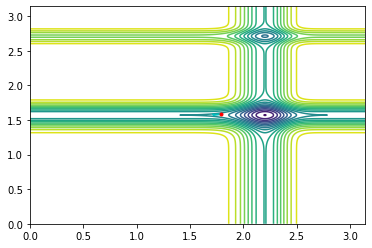

18 	 f(1.83,1.57) = -1.07   	 f(1.79,1.58) = -1.03   	 f(1.72,1.57) = -1.01


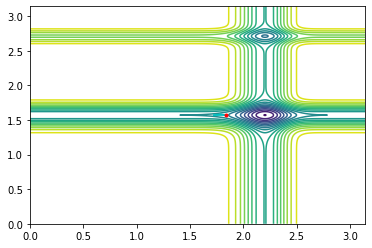

19 	 f(1.99,1.59) = -1.33   	 f(1.83,1.57) = -1.07   	 f(1.79,1.58) = -1.03


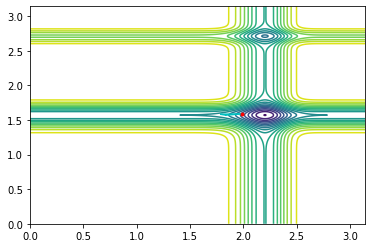

20 	 f(2.16,1.57) = -1.77   	 f(1.99,1.59) = -1.33   	 f(1.83,1.57) = -1.07


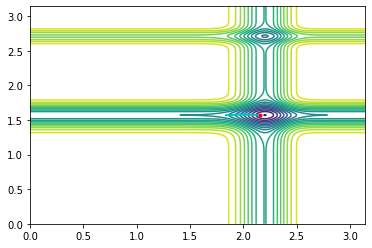

k 	      Best point        	      Good point        	     Worst point     
1 	 f(2.44,1.49) = -1.01   	 f(2.19,1.07) = -0.80   	 f(2.68,1.07) = -0.00


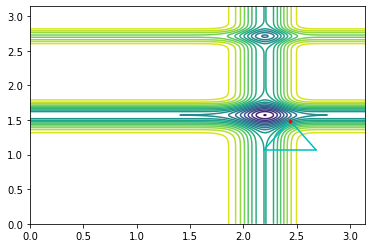

1 	 f(1.95,1.49) = -1.03   	 f(2.44,1.49) = -1.01   	 f(2.19,1.07) = -0.80


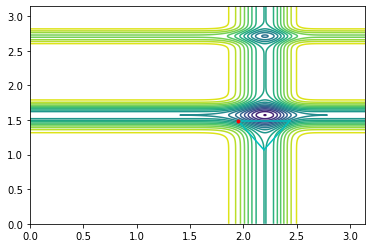

2 	 f(1.95,1.49) = -1.03   	 f(2.44,1.49) = -1.01   	 f(2.19,1.28) = -0.85


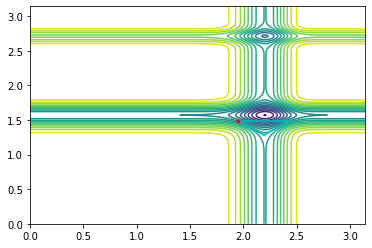

3 	 f(2.19,1.70) = -1.26   	 f(1.95,1.49) = -1.03   	 f(2.44,1.49) = -1.01


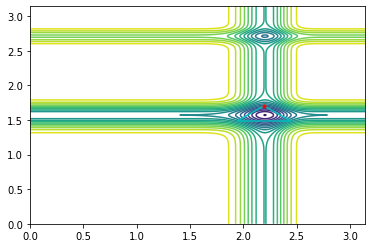

4 	 f(2.32,1.60) = -1.58   	 f(2.07,1.60) = -1.54   	 f(2.19,1.70) = -1.26


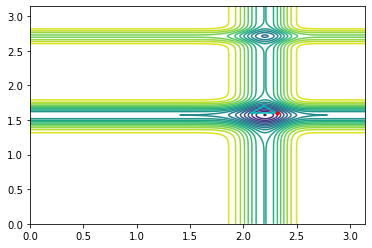

5 	 f(2.19,1.49) = -1.59   	 f(2.32,1.60) = -1.58   	 f(2.07,1.60) = -1.54


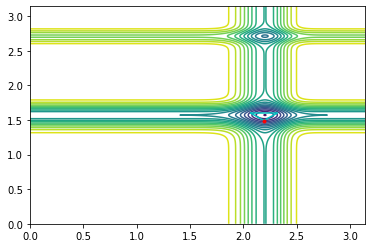

6 	 f(2.25,1.54) = -1.73   	 f(2.13,1.54) = -1.70   	 f(2.19,1.49) = -1.59


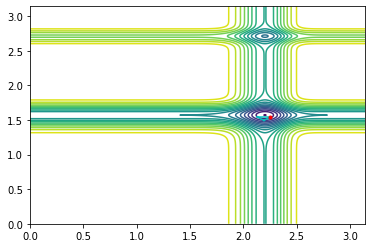

7 	 f(2.19,1.60) = -1.77   	 f(2.25,1.54) = -1.73   	 f(2.13,1.54) = -1.70


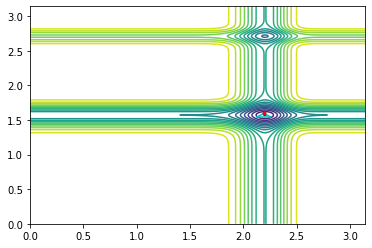

8 	 f(2.19,1.60) = -1.77   	 f(2.25,1.54) = -1.73   	 f(2.27,1.58) = -1.72


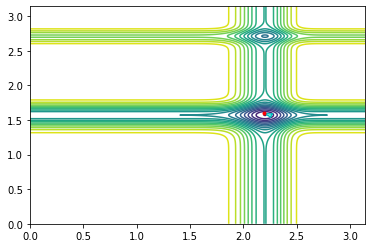

9 	 f(2.18,1.56) = -1.78   	 f(2.19,1.60) = -1.77   	 f(2.25,1.54) = -1.73


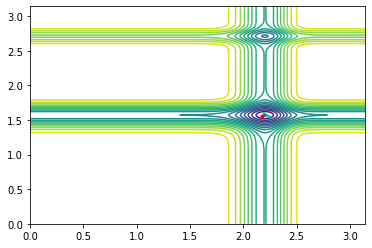

10 	 f(2.18,1.56) = -1.78   	 f(2.19,1.60) = -1.77   	 f(2.15,1.59) = -1.74


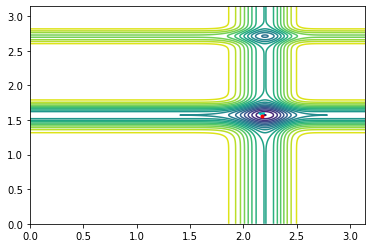

11 	 f(2.22,1.56) = -1.79   	 f(2.18,1.56) = -1.78   	 f(2.19,1.60) = -1.77


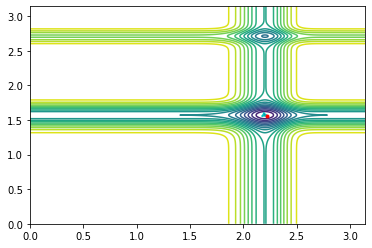

12 	 f(2.21,1.58) = -1.80   	 f(2.20,1.56) = -1.80   	 f(2.22,1.56) = -1.79


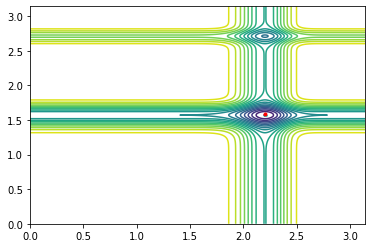

13 	 f(2.21,1.57) = -1.80   	 f(2.21,1.58) = -1.80   	 f(2.20,1.56) = -1.80


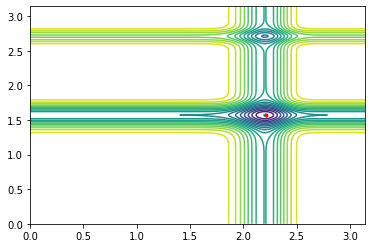

14 	 f(2.21,1.57) = -1.80   	 f(2.21,1.58) = -1.80   	 f(2.21,1.58) = -1.80


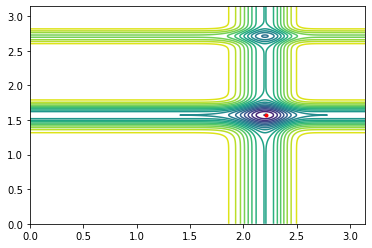

15 	 f(2.20,1.57) = -1.80   	 f(2.21,1.57) = -1.80   	 f(2.21,1.58) = -1.80


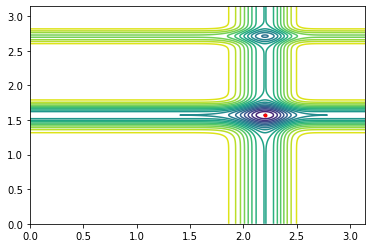

16 	 f(2.21,1.57) = -1.80   	 f(2.20,1.57) = -1.80   	 f(2.21,1.57) = -1.80


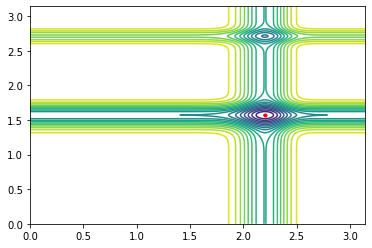

17 	 f(2.20,1.57) = -1.80   	 f(2.21,1.57) = -1.80   	 f(2.20,1.57) = -1.80


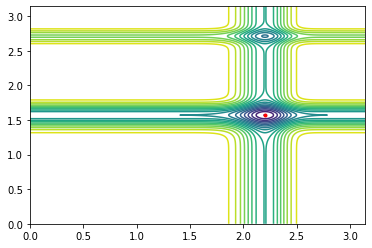

18 	 f(2.20,1.57) = -1.80   	 f(2.20,1.57) = -1.80   	 f(2.20,1.57) = -1.80


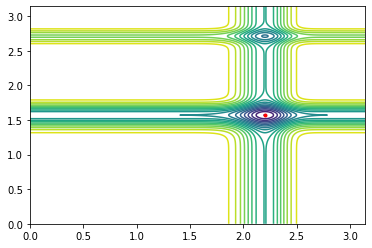

19 	 f(2.20,1.57) = -1.80   	 f(2.20,1.57) = -1.80   	 f(2.20,1.57) = -1.80


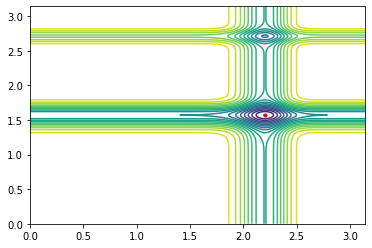

20 	 f(2.20,1.57) = -1.80   	 f(2.20,1.57) = -1.80   	 f(2.20,1.57) = -1.80


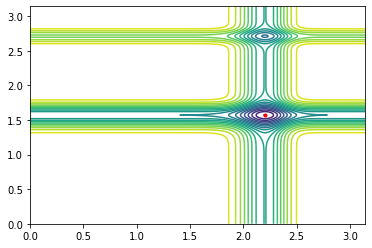

k 	      Best point        	      Good point        	     Worst point     
1 	 f(3.15,1.31) = -0.09   	 f(3.01,1.06) = -0.00   	 f(3.30,1.06) = -0.00


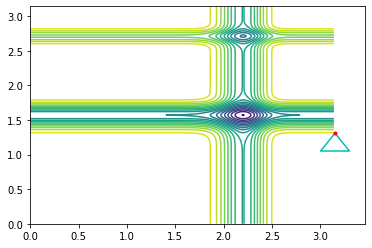

1 	 f(2.64,1.44) = -0.51   	 f(3.15,1.31) = -0.09   	 f(3.01,1.06) = -0.00


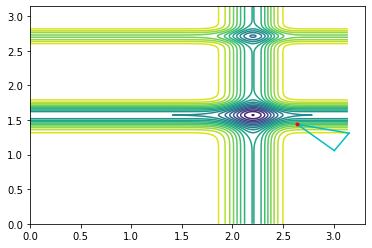

2 	 f(2.79,1.69) = -0.54   	 f(2.64,1.44) = -0.51   	 f(3.15,1.31) = -0.09


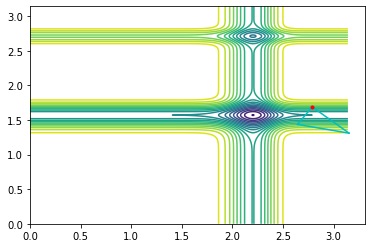

3 	 f(2.28,1.81) = -0.76   	 f(2.79,1.69) = -0.54   	 f(2.64,1.44) = -0.51


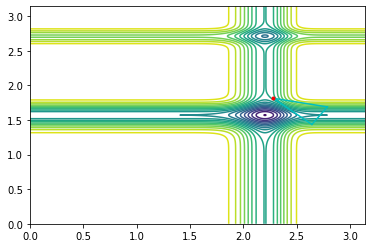

4 	 f(2.46,1.63) = -1.05   	 f(2.28,1.81) = -0.76   	 f(2.53,1.75) = -0.28


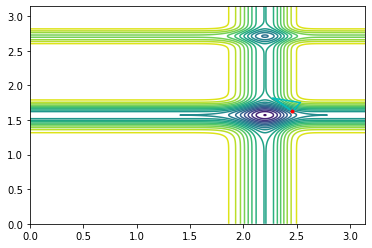

5 	 f(2.04,1.66) = -1.22   	 f(2.46,1.63) = -1.05   	 f(2.28,1.81) = -0.76


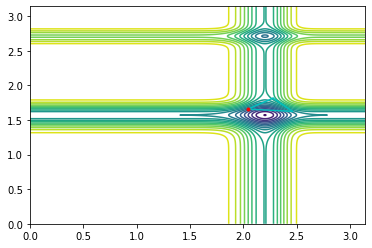

6 	 f(2.22,1.47) = -1.46   	 f(2.04,1.66) = -1.22   	 f(2.46,1.63) = -1.05


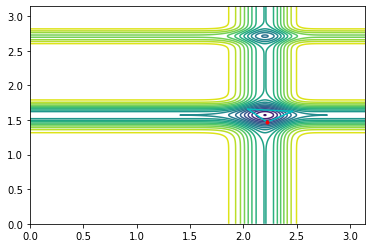

7 	 f(2.22,1.47) = -1.46   	 f(1.97,1.53) = -1.23   	 f(2.04,1.66) = -1.22


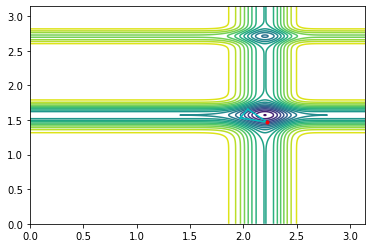

8 	 f(2.13,1.56) = -1.72   	 f(2.10,1.50) = -1.46   	 f(2.22,1.47) = -1.46


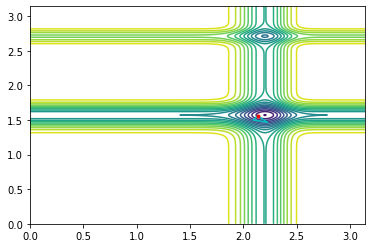

9 	 f(2.13,1.56) = -1.72   	 f(2.06,1.56) = -1.54   	 f(2.10,1.50) = -1.46


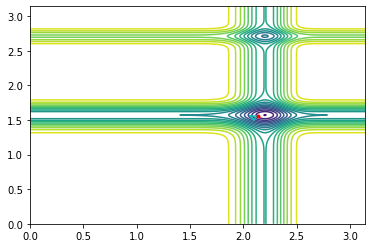

10 	 f(2.13,1.56) = -1.72   	 f(2.10,1.53) = -1.58   	 f(2.06,1.56) = -1.54


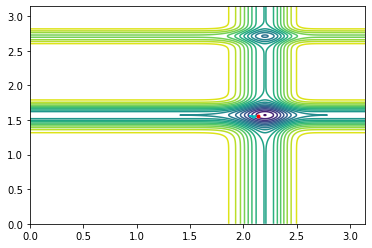

11 	 f(2.13,1.56) = -1.72   	 f(2.17,1.53) = -1.72   	 f(2.10,1.53) = -1.58


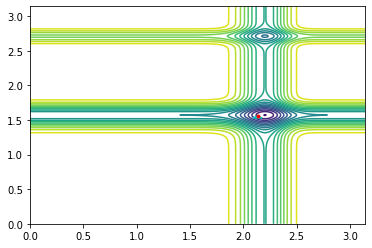

12 	 f(2.26,1.58) = -1.75   	 f(2.13,1.56) = -1.72   	 f(2.17,1.53) = -1.72


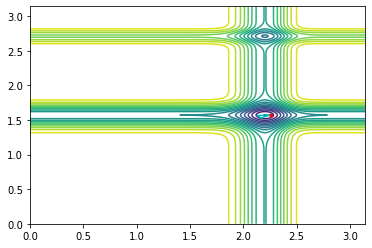

13 	 f(2.26,1.58) = -1.75   	 f(2.22,1.61) = -1.73   	 f(2.13,1.56) = -1.72


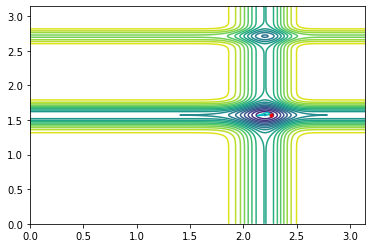

14 	 f(2.20,1.57) = -1.80   	 f(2.24,1.59) = -1.75   	 f(2.26,1.58) = -1.75


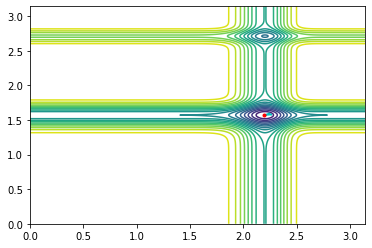

15 	 f(2.20,1.57) = -1.80   	 f(2.18,1.59) = -1.78   	 f(2.24,1.59) = -1.75


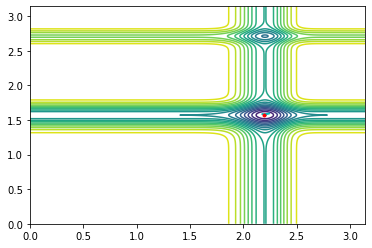

16 	 f(2.20,1.57) = -1.80   	 f(2.18,1.59) = -1.78   	 f(2.16,1.57) = -1.77


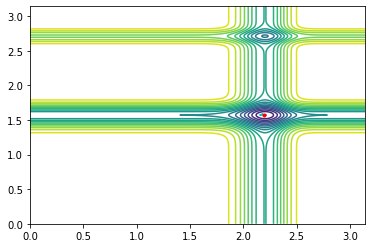

17 	 f(2.20,1.57) = -1.80   	 f(2.22,1.59) = -1.79   	 f(2.18,1.59) = -1.78


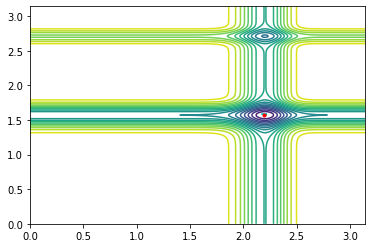

18 	 f(2.20,1.57) = -1.80   	 f(2.19,1.58) = -1.79   	 f(2.22,1.59) = -1.79


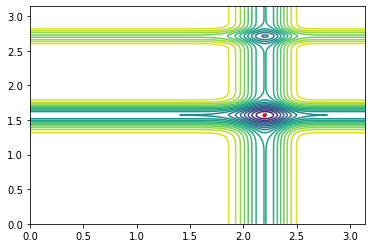

19 	 f(2.20,1.57) = -1.80   	 f(2.18,1.57) = -1.80   	 f(2.19,1.58) = -1.79


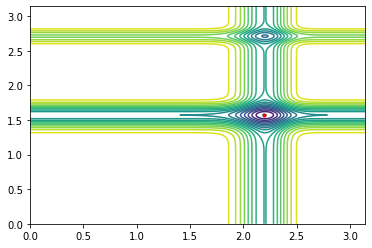

20 	 f(2.20,1.57) = -1.80   	 f(2.19,1.56) = -1.80   	 f(2.18,1.57) = -1.80


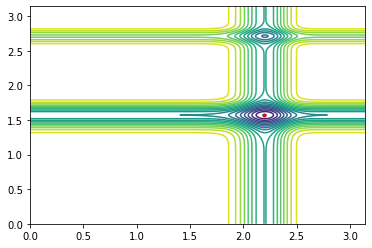

k 	      Best point        	      Good point        	     Worst point     
1 	 f(2.20,2.66) = -1.11   	 f(0.30,2.66) = -0.31   	 f(1.25,4.31) = 0.00


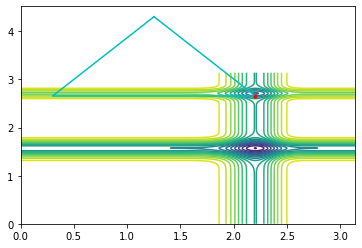

1 	 f(2.20,2.66) = -1.11   	 f(1.25,2.66) = -0.31   	 f(1.73,3.48) = 0.27


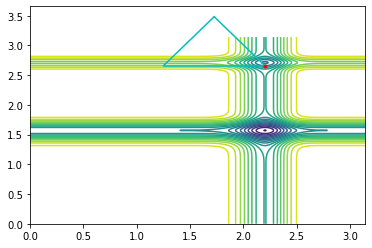

2 	 f(2.20,2.66) = -1.11   	 f(1.25,2.66) = -0.31   	 f(1.73,3.07) = -0.02


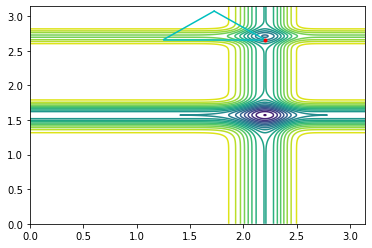

3 	 f(2.20,2.66) = -1.11   	 f(1.25,2.66) = -0.31   	 f(1.73,2.46) = -0.02


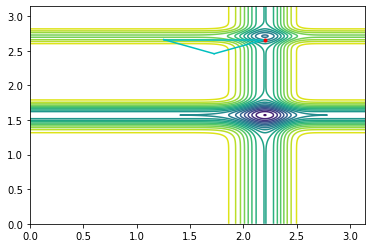

4 	 f(2.20,2.66) = -1.11   	 f(1.25,2.66) = -0.31   	 f(1.73,2.56) = -0.04


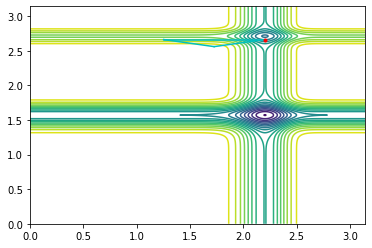

5 	 f(2.20,2.66) = -1.11   	 f(1.25,2.66) = -0.31   	 f(1.73,2.61) = -0.14


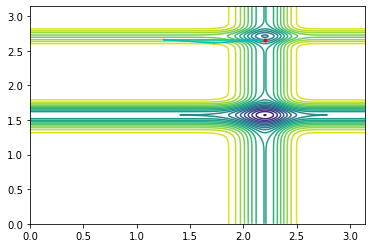

6 	 f(2.20,2.66) = -1.11   	 f(1.73,2.71) = -0.43   	 f(1.25,2.66) = -0.31


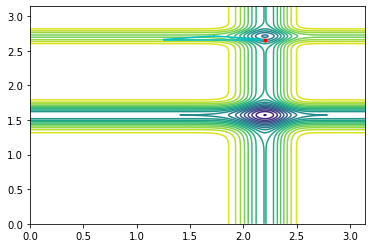

7 	 f(2.20,2.66) = -1.11   	 f(1.73,2.71) = -0.43   	 f(1.61,2.68) = -0.35


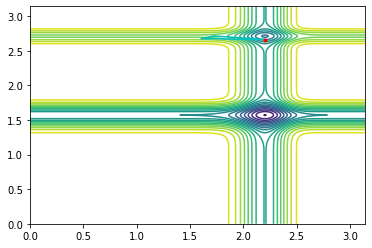

8 	 f(2.20,2.66) = -1.11   	 f(2.32,2.70) = -1.01   	 f(1.73,2.71) = -0.43


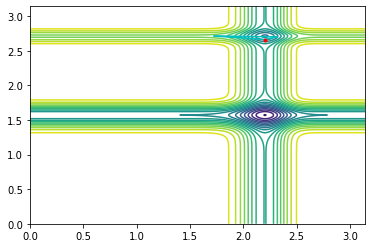

9 	 f(2.26,2.68) = -1.12   	 f(2.20,2.66) = -1.11   	 f(1.96,2.69) = -0.66


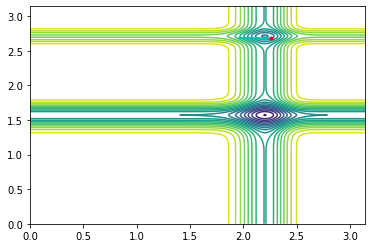

10 	 f(2.26,2.68) = -1.12   	 f(2.20,2.66) = -1.11   	 f(2.36,2.66) = -0.77


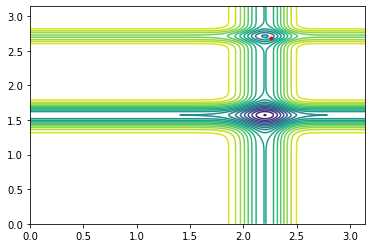

11 	 f(2.26,2.68) = -1.12   	 f(2.20,2.66) = -1.11   	 f(2.30,2.67) = -0.99


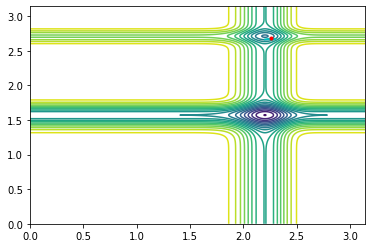

12 	 f(2.16,2.68) = -1.13   	 f(2.26,2.68) = -1.12   	 f(2.20,2.66) = -1.11


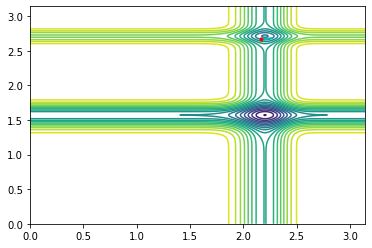

13 	 f(2.23,2.71) = -1.20   	 f(2.16,2.68) = -1.13   	 f(2.26,2.68) = -1.12


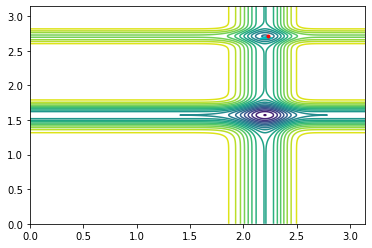

14 	 f(2.23,2.71) = -1.20   	 f(2.14,2.71) = -1.15   	 f(2.16,2.68) = -1.13


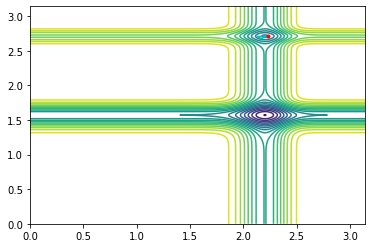

15 	 f(2.23,2.71) = -1.20   	 f(2.21,2.74) = -1.17   	 f(2.14,2.71) = -1.15


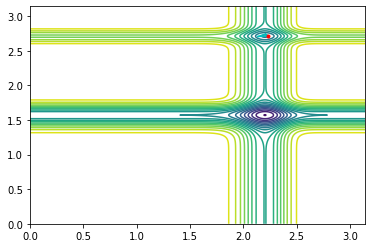

16 	 f(2.19,2.71) = -1.21   	 f(2.23,2.71) = -1.20   	 f(2.22,2.73) = -1.20


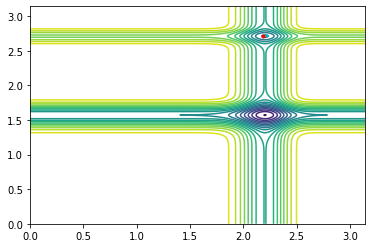

17 	 f(2.19,2.71) = -1.21   	 f(2.20,2.69) = -1.20   	 f(2.23,2.71) = -1.20


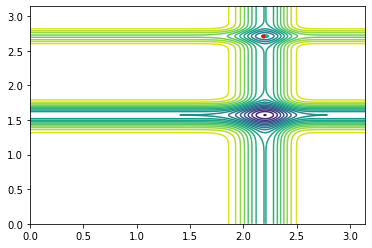

18 	 f(2.21,2.71) = -1.21   	 f(2.19,2.71) = -1.21   	 f(2.19,2.70) = -1.21


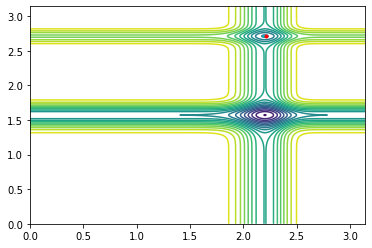

19 	 f(2.21,2.71) = -1.21   	 f(2.20,2.72) = -1.21   	 f(2.19,2.71) = -1.21


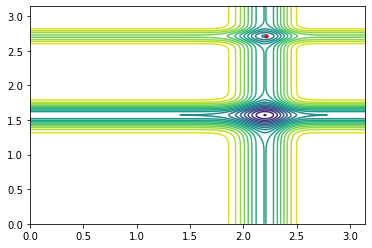

20 	 f(2.21,2.71) = -1.21   	 f(2.20,2.72) = -1.21   	 f(2.22,2.72) = -1.21


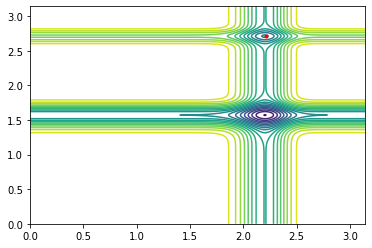

In [24]:
# Visualizing

for tups in rand_nums2:
    x,y,c = tups
    
    trg = i_trg(x,y,c)
    # print(f' Initial triangle co-ordinates :{trg}')

    o_trg = BGW(trg,michal)
    # print(f' Ordered triangle ordinates and value of function :{o_trg}\n')

    # algorithm
    nelder_mead(o_trg,michal,20,plot=True, do_print=True)